# Introduction - Graded Challenge 6

| **Nama**       | **Heru Ramadhan** |
|----------------|--------------------|
| **Batch**      | HCK - 018          |

#### Objective

Notebook ini bertujuan untuk melakukan segmentasi pelanggan dari data kartu kredit sebuah bank yang akan digunakan untuk membuat strategi berdasarkan hasil segmentasi tersebut.

# Query SQL

Dataset yang digunakan:
* Project ID : `ftds-hacktiv8-project`
+ Batch Offline : `phase1_ftds_018_hck`
* Table Name : `credit-card-information`

Kriteria Data:
* Batch genap (FTDS-002, FTDS-004, dst) : semua data dengan column `CUST_ID` bernilai genap.

## Connecting to BigQuery from Google Colab

Koneksikan data di atas menggunakan `BigQuery` ke Google Colab dengan code berikut:

#### 1. Authenticate

```py
from google.colab import auth
from google.cloud import bigquery

# Authenticate the user
auth.authenticate_user()
print('Authenticated')

# Set up the BigQuery client
project_id = "myproject7-427010"
client = bigquery.Client(project=project_id)
```

#### 2. Query

```py
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_018_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0 

''').to_dataframe()

df
```


# Import Libraries

In [43]:
# Import Libraries yang dibutuhkan
import pandas as pd
import numpy as np

# library untuk visualisasi data
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# library untuk capping data
from feature_engine.outliers import Winsorizer

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Model
from sklearn.cluster import KMeans

# silhouette
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# pipeline
from sklearn.pipeline import make_pipeline

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# model saving
import pickle

# Data Loading

In [2]:
# melakukan penambahan csv kedalam sebuah dataframe
df = pd.read_csv('/Users/Heru/HCK18/Phase 1/GC6/p1-ftds018-hck-g6-herurmdn7/P1G6_Set_1_Heru.csv')

# melakukan concat untuk memperlihatkan top 10 dan bottom 10
topBottom = pd.concat([df.head(10), df.tail(10)])

# memanggil variabel yang sudah diconcat
topBottom

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
5        4266  2237.238086           1.000000     120.00            120.00   
6        4360  2730.843802           1.000000    2900.00           2900.00   
7        4680   424.994385           0.375000    1200.00           1200.00   
8        5884    18.885677           0.375000      57.00             57.00   
9          24     0.004816           0.545455      51.70              0.00   
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
9                      51.70      0.000000             0.250000   
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
6                       0.125000                          0.000000   
7                       0.125000                          0.000000   
8                       0.125000                          0.000000   
9                       0.000000                          0.250000   
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                 

## Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Setelah melakukan data loading, didapati data sebagai berikut:**
- Data memiliki 18 kolom
- Data berjumlah 4475 baris
- Data memiliki 14 tipe float64
- Data memiliki 4 tipe integer
- Data tidak memiliki tipe object
- Missing value pada 2 kolom

| column_name                 | data_type | description                                                                                      |
|-----------------------------|-----------|--------------------------------------------------------------------------------------------------|
| CUST_ID                     | INT64     | Identification of Credit Card holder                                                             |
| BALANCE                     | FLOAT64   | Balance amount left in their account to make purchases                                           |
| BALANCE_FREQUENCY           | FLOAT64   | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES                   | FLOAT64   | Amount of purchases made from account                                                            |
| ONEOFF_PURCHASES            | FLOAT64   | Maximum purchase amount done in one-go                                                           |
| INSTALLMENTS_PURCHASES      | FLOAT64   | Amount of purchase done in installment                                                           |
| CASH_ADVANCE                | FLOAT64   | Cash in advance given by the user                                                                |
| PURCHASES_FREQUENCY         | FLOAT64   | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFF_PURCHASES_FREQUENCY  | FLOAT64   | How frequently Purchases are happening in one-go (0 to 1 scale, higher means more frequent)     |
| PURCHASES_INSTALLMENTS_FREQUENCY | FLOAT64 | How frequently purchases in installments are being done (0 to 1 scale, higher means more frequent) |
| CASH_ADVANCE_FREQUENCY      | FLOAT64   | How frequently the cash in advance being paid (0 to 1 scale, higher means more frequent)        |
| CASH_ADVANCE_TRX            | INT64     | Number of Transactions made with 'Cash in Advanced'                                              |
| PURCHASES_TRX               | INT64     | Number of purchase transactions made                                                             |
| CREDIT_LIMIT                | FLOAT64   | Limit of Credit Card for user                                                                    |
| PAYMENTS                    | FLOAT64   | Amount of Payment done by user                                                                   |
| MINIMUM_PAYMENTS            | FLOAT64   | Minimum amount of payments made by user                                                          |
| PRC_FULL_PAYMENT            | FLOAT64   | Percent of full payment paid by user                                                             |
| TENURE                      | INT64     | Tenure of credit card service for user                                                           |


## Data duplication and missing value check

In [4]:
# cek duplikat pada data
print('jumlah duplikasi data: ', df.duplicated().sum())

# cek missing values pada data
print('jumlah missing value pada data: ', df.isnull().sum())

jumlah duplikasi data:  0
jumlah missing value pada data:  CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Setelah melakukan pengecekan terhadap duplikasi data dan missing values, didapati data sebagai berikut:**
- tidak terdapat duplikasi data pada dataframe tersebut
- terdapat missing values pada kolom `payments` dan `minimum_payments` sebanyak 159 atau sebanyak 3% pada data

# Exploratory Data Analysis (EDA)

In [5]:
# melakukan copy pada dataframe
df1 = df.copy()

# memperlihatkan 10 row teratas dari dataframe tersebut
df1.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

## How Frequently the Balance got updated?

In [6]:
# function to categorize balance frequency
def cekkol(balance):
    if 0 <= balance <= 0.25:
        return 'Low'
    elif 0.26 <= balance <= 0.75:
        return 'Medium'
    else:
        return 'High'
    
# apply function
df1['Balance Frequency']=df1['BALANCE_FREQUENCY'].apply(cekkol)

balanceFrequency = df1['Balance Frequency'].value_counts()
kol = balanceFrequency.reset_index()
kol.columns = ['Balance Frequency','jumlah']

# display dataframe
display(kol)

fig = px.pie(kol, names="Balance Frequency", 
              values="jumlah", 
              title="Balance Frequency Distribution",
              hover_data=["jumlah"], 
              )
fig.show()


Balance Frequency  jumlah
0              High    3606
1            Medium     697
2               Low     172

**Berdasarkan informasi pie chart diatas, dapat disimpulkan bahwa:**<br>
- 80.6% atau 3.606 customer termasuk kekategori yang sering melakukan update balance
- 15.6% atau 697 customer termasuk kekategori yang terkadang melakukan update balance
- 3.84% atau 3.606 customer termasuk kekategori yang jarang melakukan update balance

## Average Purchases by Tenure

In [7]:
avgCredbyTen = df1.groupby('TENURE')['PURCHASES'].mean().reset_index()
display(avgCredbyTen)

fig = px.bar(avgCredbyTen, x='TENURE', y='PURCHASES', orientation='v',text_auto='.2s', title='Average Purchases by Tenure')
fig.show()


TENURE    PURCHASES
0       6   403.658252
1       7   470.298300
2       8   477.973299
3       9   515.425568
4      10   536.483860
5      11   597.291024
6      12  1089.702270

**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- rata rata pembelian yang tinggi jika tenor 12 bulan
- rata rata pembelian yang rendah jika tenor kurang dari 10 bulan

## Purchases Frequency Distribution

In [8]:
# Function to categorize PURCHASES_FREQUENCY
def categorize_purchases_frequency(frequency):
    if 0 <= frequency <= 0.25:
        return 'Low'
    elif 0.26 <= frequency <= 0.75:
        return 'Medium'
    else:
        return 'High'

# Apply function to categorize
df1['Purchases Frequency Category'] = df1['PURCHASES_FREQUENCY'].apply(categorize_purchases_frequency)
purchases_frequency_counts = df1['Purchases Frequency Category'].value_counts()
purchases_frequency_df = purchases_frequency_counts.reset_index()
purchases_frequency_df.columns = ['Purchases Frequency', 'Jumlah']

# Display dataframe
display(purchases_frequency_df)

fig = px.pie(purchases_frequency_df, names="Purchases Frequency", 
              values="Jumlah", 
              title="Purchases Frequency Distribution",
              hover_data=["Jumlah"], 
              )
fig.show()


Purchases Frequency  Jumlah
0                 Low    1811
1                High    1534
2              Medium    1130

**Berdasarkan informasi bar chart diatas, dapat disimpulkan bahwa:**<br>
- sebanyak 40.5% customer memiliki frekuensi pembelian yang rendah
- sebanyak 34.3% customer memiliki frekuensi pembelian yang tinggi
- sebanyak 25.3% customer memiliki frekuensi pembelian yang sedang

# Feature Engineering

In [9]:
# melakukan copy pada dataframe
df2 = df.copy()

# memperlihatkan 10 row teratas dari dataframe tersebut
df2.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

## Handling Missing Values

In [10]:
# cek duplikat pada data
print('jumlah duplikasi data: ', df2.duplicated().sum())

# cek missing values pada data
print('jumlah missing value pada data: ', df2.isnull().sum())

jumlah duplikasi data:  0
jumlah missing value pada data:  CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Setelah melakukan pengecekan terhadap duplikasi data dan missing values, didapati data sebagai berikut:**
- tidak terdapat duplikasi data pada dataframe tersebut
- terdapat missing values pada kolom `payments` dan `minimum_payments` sebanyak 159 atau sebanyak 3% pada data

Dikarenakan jumlah missing value pada data < 5% maka dilakukan proses drop pada missing value

In [11]:
# remove duplicates
df2.drop_duplicates(inplace=True)
print('jumlah duplikasi data: ', df2.duplicated().sum())

# Melakukan drop missing value pada dataframe df3
df2.dropna(inplace=True)
print('jumlah missing value pada data: ', df2.duplicated().sum())

jumlah duplikasi data:  0
jumlah missing value pada data:  0


## Cardinality Test

In [12]:
# membuat function untuk cek cardinalitas data
def cardinality_func(dataframe):

    # membuat empty list
    columns = []
    nunique = []
    unique = []

    # memilih kolom bertipe object
    for column in dataframe:
        columns.append(column)
        nunique.append(dataframe[column].nunique())
        unique.append(dataframe[column].unique())

    # membuat dataframe 
    cardinality_df = pd.DataFrame({
    'nama kolom' : columns,
    'jumlah unique' : nunique,
    'unique':unique})

    return cardinality_df

# memanggil function 
cardinality_func(df2)

nama kolom  jumlah unique  \
0                            CUST_ID           4316   
1                            BALANCE           4313   
2                  BALANCE_FREQUENCY             38   
3                          PURCHASES           3118   
4                   ONEOFF_PURCHASES           2022   
5             INSTALLMENTS_PURCHASES           2292   
6                       CASH_ADVANCE           2091   
7                PURCHASES_FREQUENCY             47   
8         ONEOFF_PURCHASES_FREQUENCY             44   
9   PURCHASES_INSTALLMENTS_FREQUENCY             47   
10            CASH_ADVANCE_FREQUENCY             46   
11                  CASH_ADVANCE_TRX             55   
12                     PURCHASES_TRX            147   
13                      CREDIT_LIMIT            151   
14                          PAYMENTS           4316   
15                  MINIMUM_PAYMENTS           4316   
16                  PRC_FULL_PAYMENT             47   
17                            TENURE              7   

                                               unique  
0   [1902, 3426, 3976, 4266, 4680, 24, 172, 190, 2...  
1   [943.584041, 461.45572, 1053.59473, 2237.23808...  
2   [0.875, 1.0, 0.375, 0.545455, 0.454545, 0.3636...  
3   [103.0, 585.0, 1450.0, 120.0, 1200.0, 51.7, 41...  
4   [103.0, 585.0, 1450.0, 120.0, 1200.0, 0.0, 297...  
5   [0.0, 51.7, 41.07, 639.56, 393.87, 49.55, 327....  
6   [0.0, 1103.30382, 455.227731, 1977.834772, 138...  
7   [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, ...  
8   [0.125, 0.0, 0.25, 0.083333, 0.166667, 0.375, ...  
9   [0.0, 0.25, 0.166667, 0.125, 0.083333, 0.33333...  
10  [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....  
11  [0, 1, 2, 4, 9, 3, 10, 5, 12, 7, 11, 15, 6, 14...  
12  [1, 3, 5, 4, 8, 2, 6, 12, 17, 7, 10, 9, 14, 11...  
13  [1000.0, 1500.0, 2500.0, 1200.0, 3000.0, 6000....  
14  [215.325023, 258.03263, 397.090516, 343.102984...  
15  [410.484825, 151.696433, 227.143184, 712.98638...  
16  [0.0, 0.333333, 0.222222, 0.25, 0.75, 1.0, 0.5...  
17                           [8, 12, 10, 6, 7, 11, 9]

Data memiliki nilai kardinalitas yang tinggi, dikarenakan beberapa kolom memiliki isi data berupa range dari 0 hingga 1, dan kolom `cust_id` yang berisi unique identifier setiap customer. oleh karena itu kolom `cust_id` akan di drop

### Droping Column

**Melakukan drop pada kolom `CUST_ID` dan `TENURE`, hal ini dilakukan karena:**
- `CUST_ID` berisi unique identifier setiap customer
- `TENURE` merupakan kolom dengan tipe kategorikal, sehingga tidak dapat digunakan terhadap model K-MEANS

In [13]:
# drop column
df2 = df2.drop(columns=['CUST_ID','TENURE'])

# show top 5 row
df2.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1   943.584041              0.875      103.0             103.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   
5  2237.238086              1.000      120.0             120.0   
7   424.994385              0.375     1200.0            1200.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   
5                       0.125                               0.0   
7                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                     0.0                 0              1        1000.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
7                     0.0                 0              1        1200.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
1  215.325023        410.484825               0.0  
3  258.032630        151.696433               0.0  
4  397.090516        227.143184               0.0  
5  343.102984        712.986387               0.0  
7   57.266292         56.720210               0.0

## Outlier Handling

Melakukan Outlier Handling dikarenakan model K-MEANS yang sensitive terhadap outlier.

In [14]:
# Membuat function untuk menghitung nilai skew, upper dan lower boundary, dan outlier
def outlier_analysis(data):

    # membuat dataframe dan empty list
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    type = []
    has_outliers = [] 

    # menseleksi kolom dengan memilih numerik kolom saja
    num_columns = data.select_dtypes(include=['int64','float64'])

    # melakukan pengecualian terhadap beberapa kolom yang merupakan kolom categorical 
    # Loop 
    for col in num_columns:
        col_name.append(col)

        # skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # extreme skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)
            type.append('extreme skew')

        # Moderate skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)
            type.append('moderate skew')

        # Normal
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
            type.append('normal skew')
        
        # append nilai upper dan lower ke empty list 
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # pengecekan outlier
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Menambahkan list sebelumnya ke dalam sebuah dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['skew type'] = type
    result['has_outliers'] = has_outliers  

    return result

# memanggil function dan membuat variabel baru
outliercheck = outlier_analysis(df2)

# memanggil variabel
outliercheck

columns   skewness  upper boundary  \
0                            BALANCE   2.440901     7991.156441   
1                  BALANCE_FREQUENCY  -2.083168        1.272727   
2                          PURCHASES   8.902272     4465.772500   
3                   ONEOFF_PURCHASES  10.045515     2400.000000   
4             INSTALLMENTS_PURCHASES   8.030305     1994.370000   
5                       CASH_ADVANCE   4.713175     4440.994105   
6                PURCHASES_FREQUENCY   0.035642        2.995677   
7         ONEOFF_PURCHASES_FREQUENCY   1.494505        1.333332   
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.486577        2.619805   
9             CASH_ADVANCE_FREQUENCY   1.788835        1.000000   
10                  CASH_ADVANCE_TRX   4.722877       16.000000   
11                     PURCHASES_TRX   4.429897       65.000000   
12                      CREDIT_LIMIT   1.525379    21500.000000   
13                          PAYMENTS   5.987445     6535.835019   
14                  MINIMUM_PAYMENTS  12.356758     2812.991433   
15                  PRC_FULL_PAYMENT   1.854400        0.666668   

    lower boundary     skew type  has_outliers  
0     -5725.832245  extreme skew          True  
1         0.636364  extreme skew          True  
2     -3271.170000  extreme skew          True  
3     -1800.000000  extreme skew          True  
4     -1495.777500  extreme skew          True  
5     -3330.745579  extreme skew          True  
6        -2.004327   normal skew         False  
7        -0.999999  extreme skew         False  
8        -1.880195   normal skew         False  
9        -0.750000  extreme skew          True  
10      -12.000000  extreme skew          True  
11      -47.000000  extreme skew          True  
12   -13500.000000  extreme skew          True  
13    -4153.040854  extreme skew          True  
14    -1812.456014  extreme skew          True  
15       -0.500001  extreme skew          True

**Berdasarkan data tersebut dapat disimpulkan bahwa:**
- Terdapat 13 kolom yang memiliki outlier
- Terdapat 3 kolom yang **tidak mempunyai outlier**
    - `PURCHASES_FREQUENCY`
    - `ONEOFF_PURCHASES_FREQUENCY`
    - `PURCHASES_INSTALLMENTS_FREQUENCY`
- Terdapat 2 kolom dengan distribusi data normal yaitu:
    - `PURCHASES_FREQUENCY`
    - `PURCHASES_INSTALLMENTS_FREQUENCY`

- Tidak ada kolom dengan moderate skew 
- Terdapat 14 kolom dengan extreme skew yaitu:
    - `BALANCE`
    - `BALANCE_FREQUENCY`
    - `PURCHASES`
    - `ONEOFF_PURCHASES`
    - `INSTALLMENTS_PURCHASES`
    - `CASH_ADVANCE`
    - `CASH_ADVANCE_FREQUENCY`
    - `CASH_ADVANCE_TRX`
    - `PURCHASES_TRX`
    - `CREDIT_LIMIT`
    - `PAYMENTS`
    - `MINIMUM_PAYMENTS`
    - `PRC_FULL_PAYMENT`
    - `ONEOFF_PURCHASES_FREQUENCY`

In [15]:
haveOutlier = outliercheck[(outliercheck['has_outliers']==True)]['columns'].tolist()
haveOutlier

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

- Terdapat 14 kolom dengan outlier yaitu:
    - `BALANCE`
    - `BALANCE_FREQUENCY`
    - `PURCHASES`
    - `ONEOFF_PURCHASES`
    - `INSTALLMENTS_PURCHASES`
    - `CASH_ADVANCE`
    - `CASH_ADVANCE_FREQUENCY`
    - `CASH_ADVANCE_TRX`
    - `PURCHASES_TRX`
    - `CREDIT_LIMIT`
    - `PAYMENTS`
    - `MINIMUM_PAYMENTS`
    - `PRC_FULL_PAYMENT`

### Data Capping 

Melakukan data capping agar dapat menghilangkan outlier

In [16]:
# filter data yang mempunyai distribusi moderate dan extreme
restskew = ['BALANCE',
 'BALANCE_FREQUENCY',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'CREDIT_LIMIT',
 'INSTALLMENTS_PURCHASES',
 'MINIMUM_PAYMENTS',
 'ONEOFF_PURCHASES',
 'PAYMENTS',
 'PRC_FULL_PAYMENT',
 'PURCHASES',
 'PURCHASES_TRX']
# Capping 
winsoriser_fare = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=restskew
)

datacapped = winsoriser_fare.fit_transform(df2)

### Visualization

Visualisasi outlier pada data, perbandingan antara sebelum dan sesudah dilakukannya capping.

In [17]:
# function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BALANCE - Before Capping


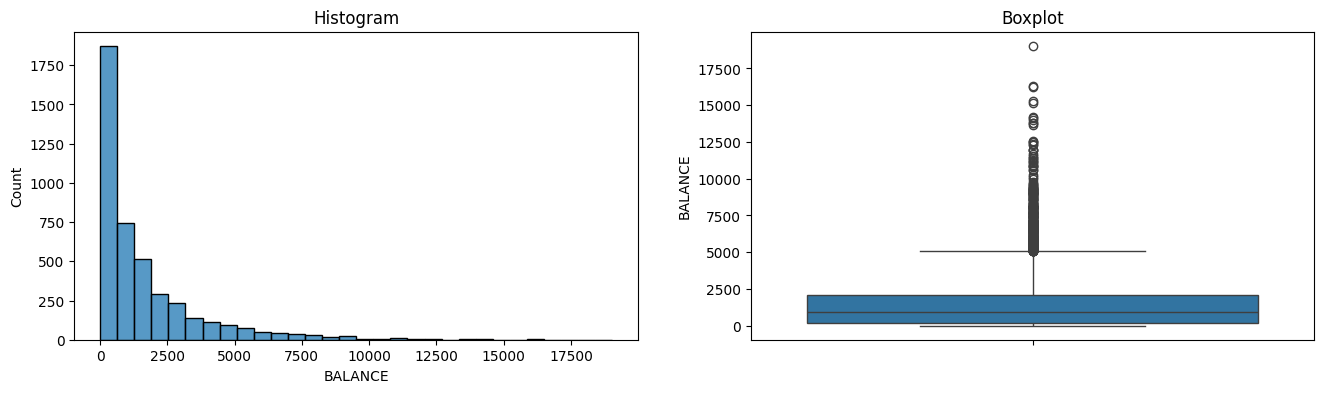


BALANCE - After Capping


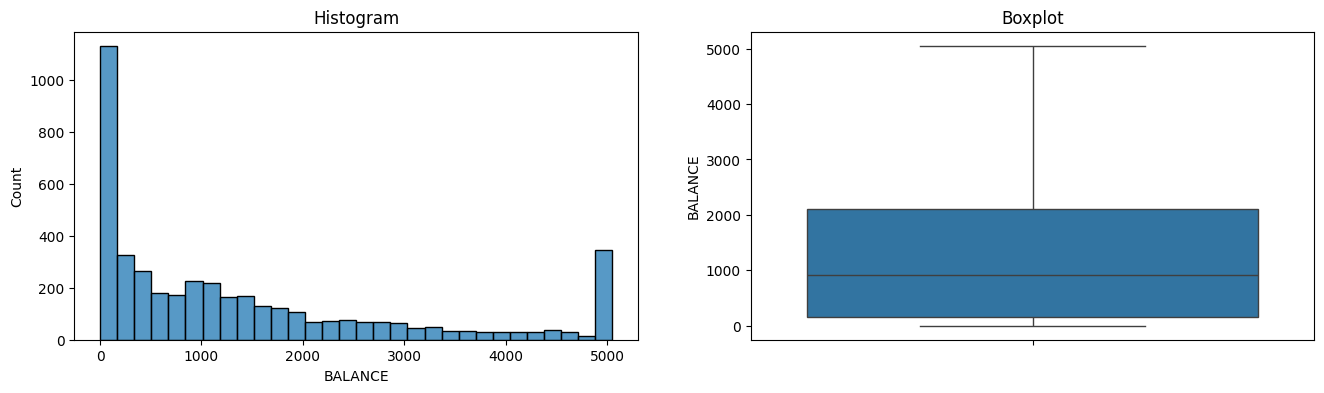

BALANCE_FREQUENCY - Before Capping


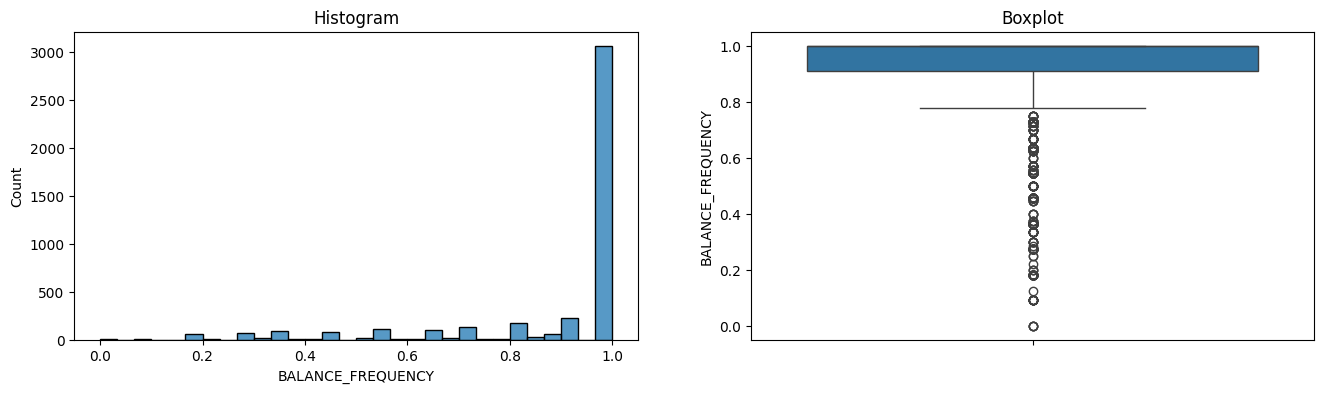


BALANCE_FREQUENCY - After Capping


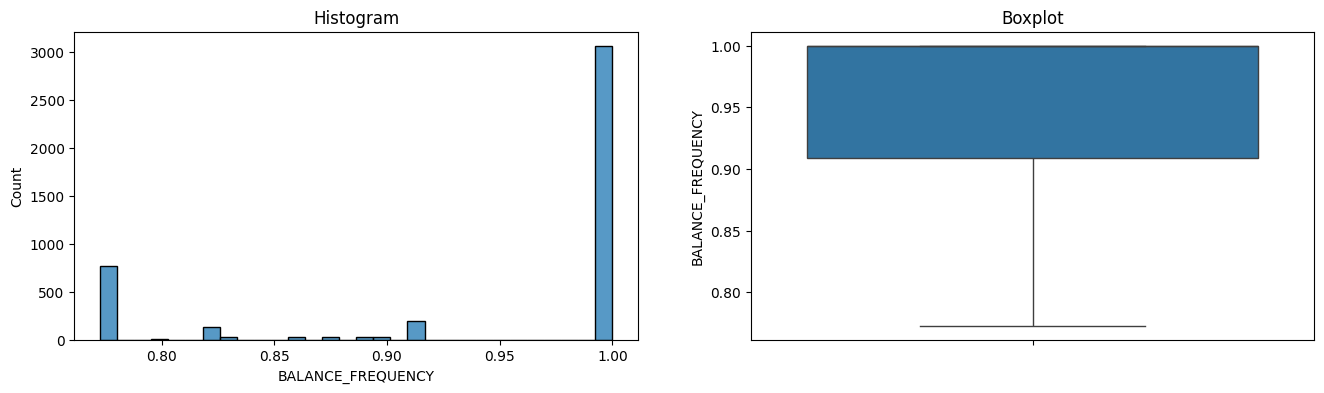

CASH_ADVANCE - Before Capping


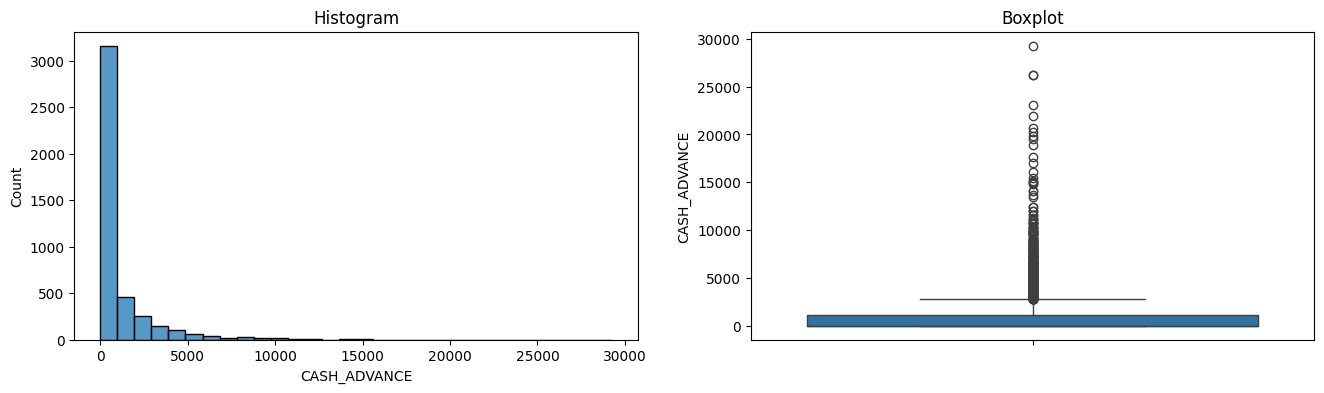


CASH_ADVANCE - After Capping


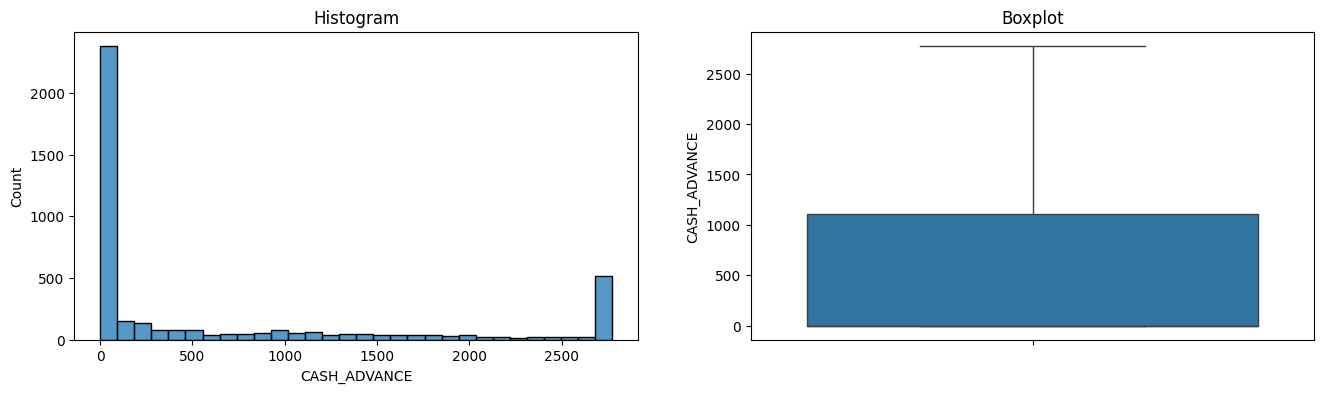

CASH_ADVANCE_FREQUENCY - Before Capping


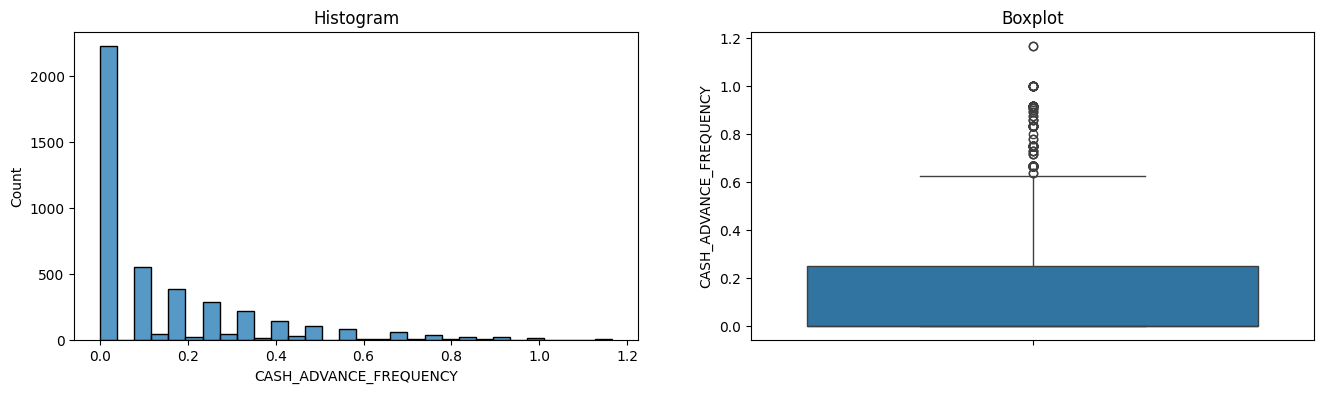


CASH_ADVANCE_FREQUENCY - After Capping


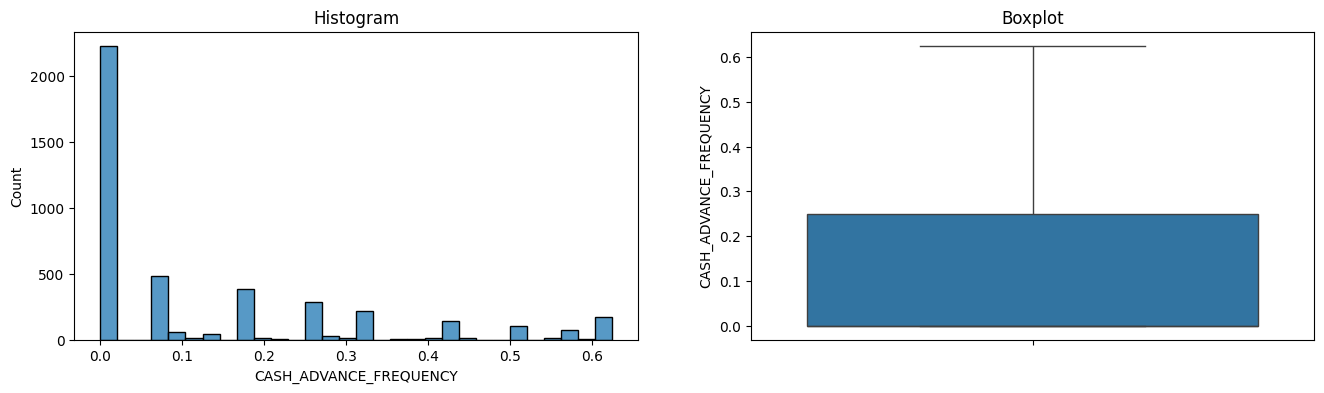

CASH_ADVANCE_TRX - Before Capping


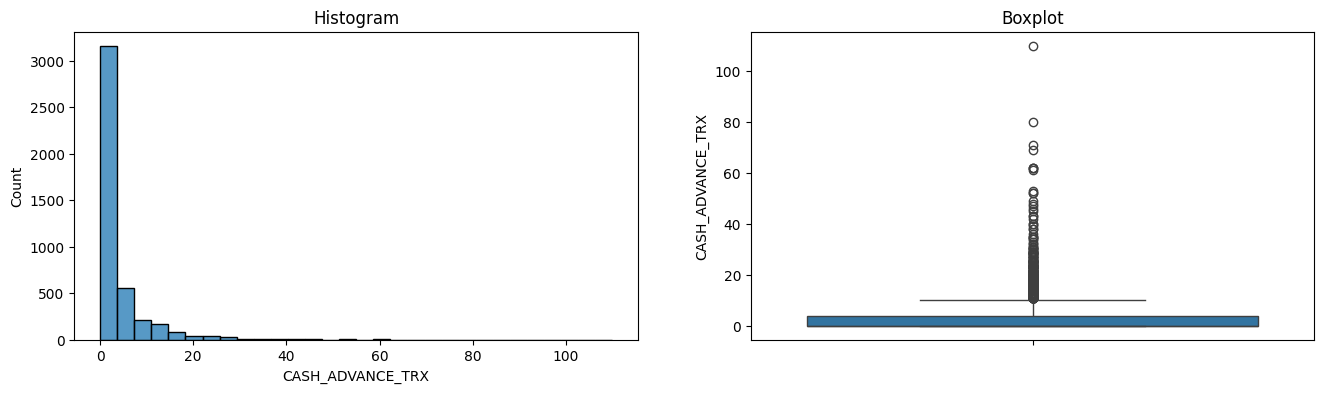


CASH_ADVANCE_TRX - After Capping


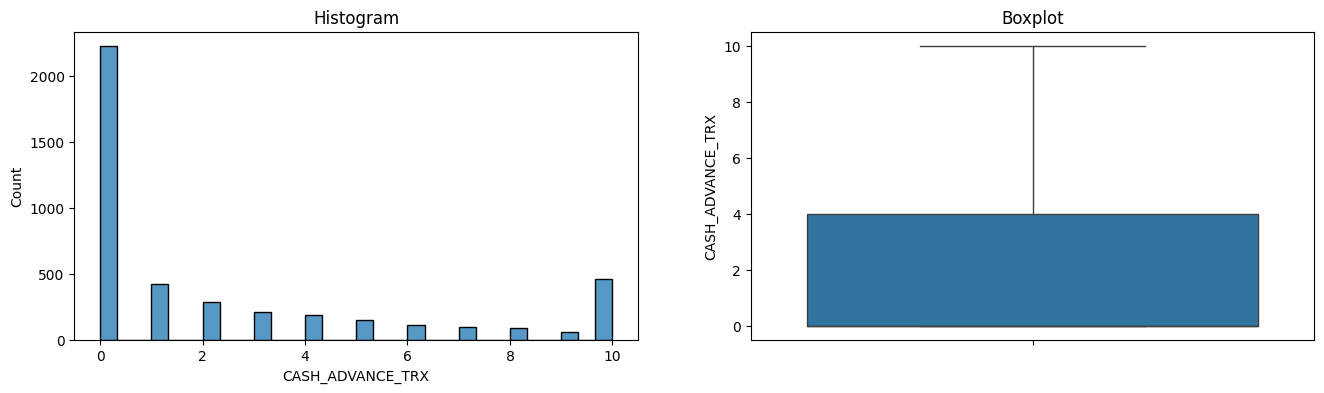

CREDIT_LIMIT - Before Capping


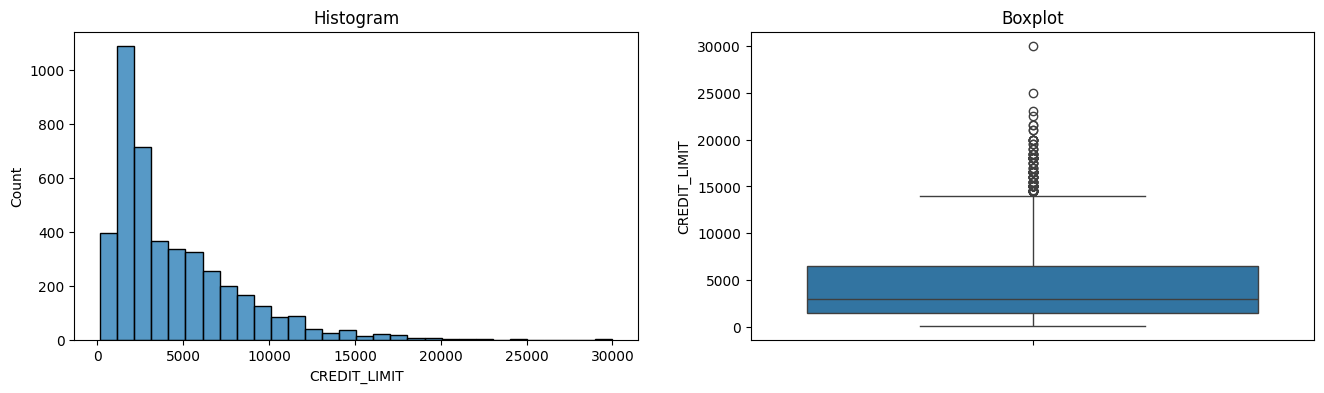


CREDIT_LIMIT - After Capping


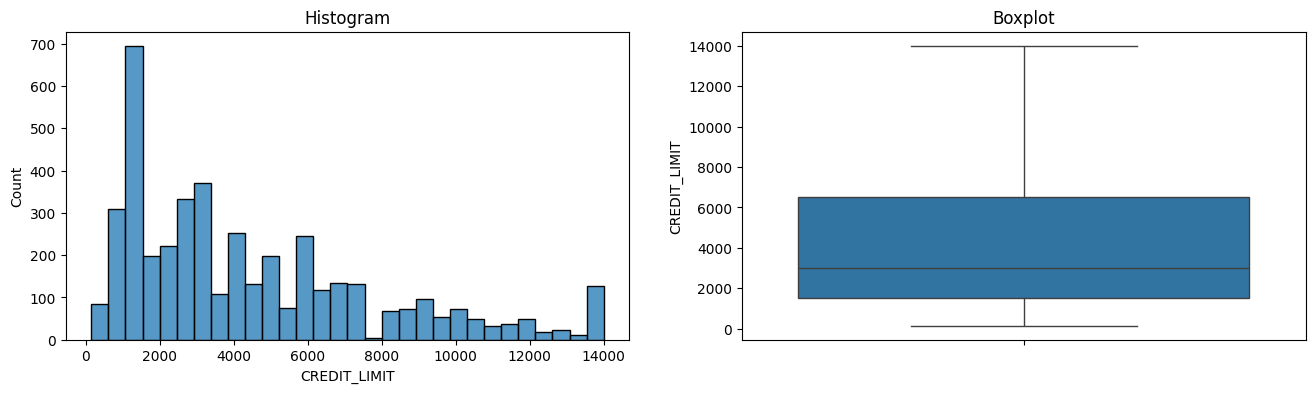

INSTALLMENTS_PURCHASES - Before Capping


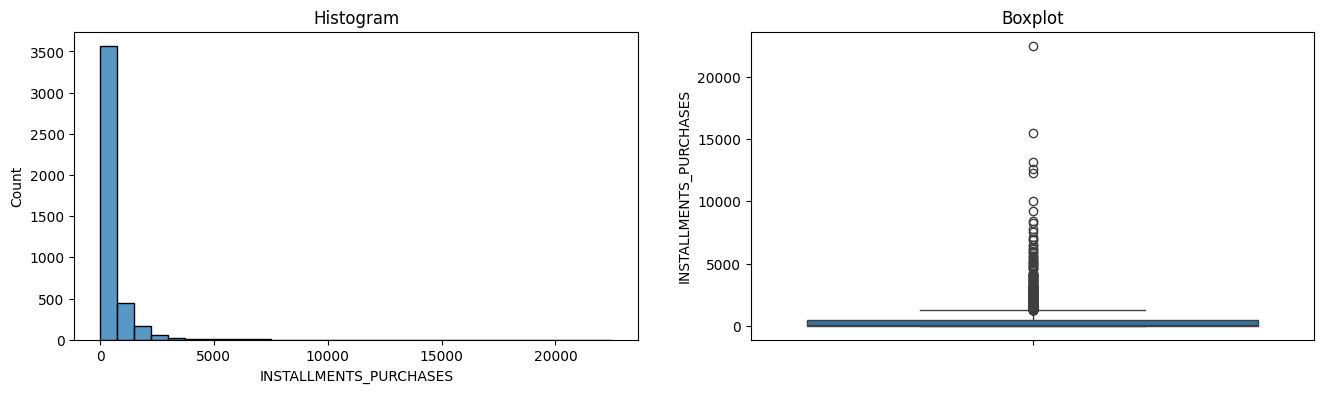


INSTALLMENTS_PURCHASES - After Capping


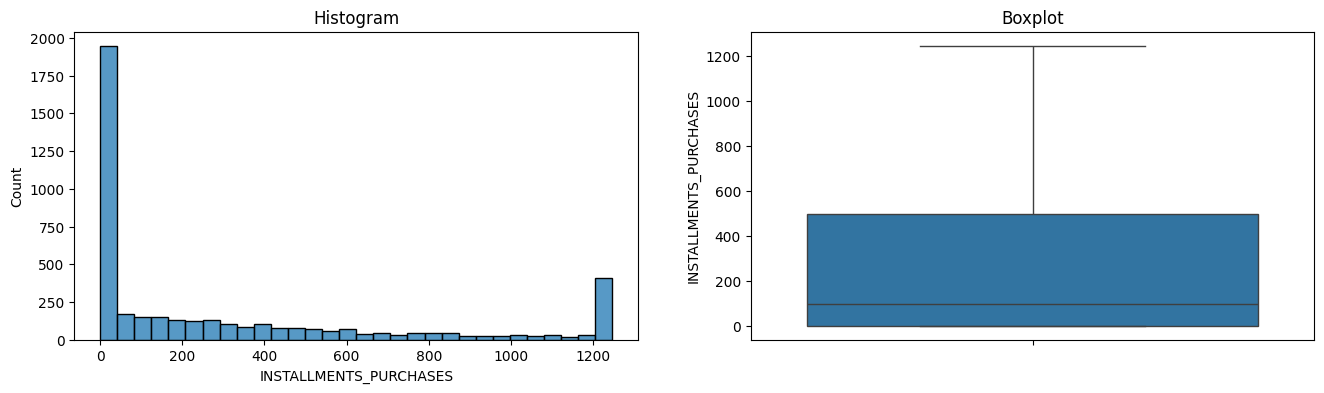

MINIMUM_PAYMENTS - Before Capping


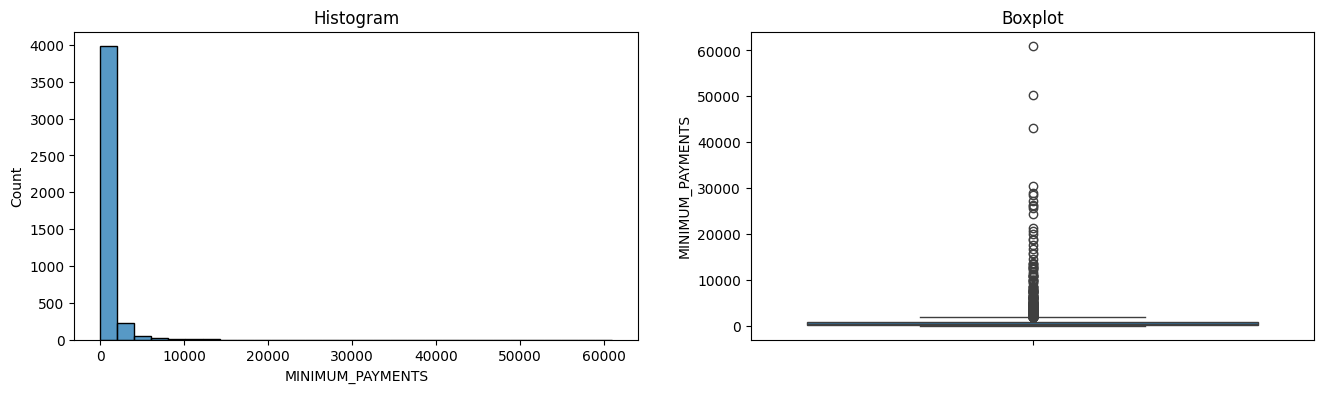


MINIMUM_PAYMENTS - After Capping


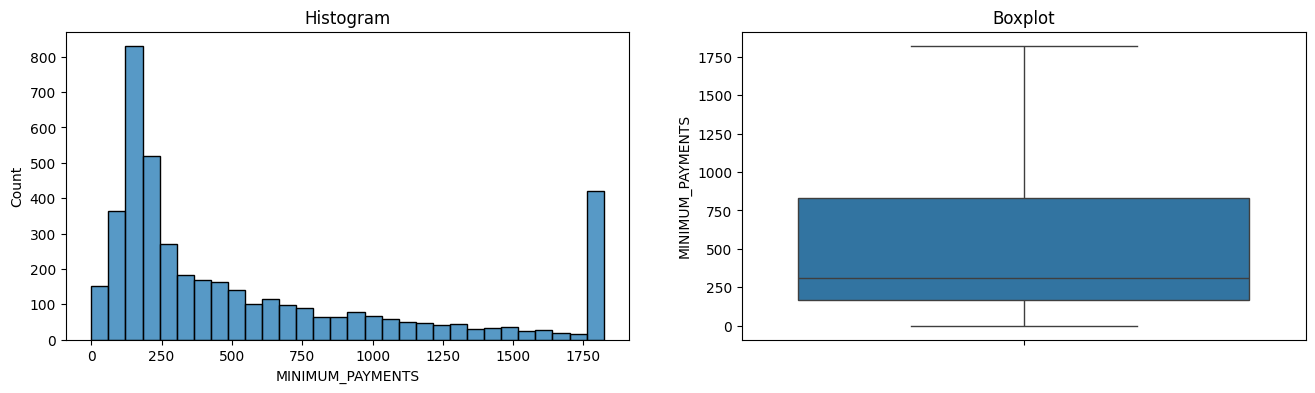

ONEOFF_PURCHASES - Before Capping


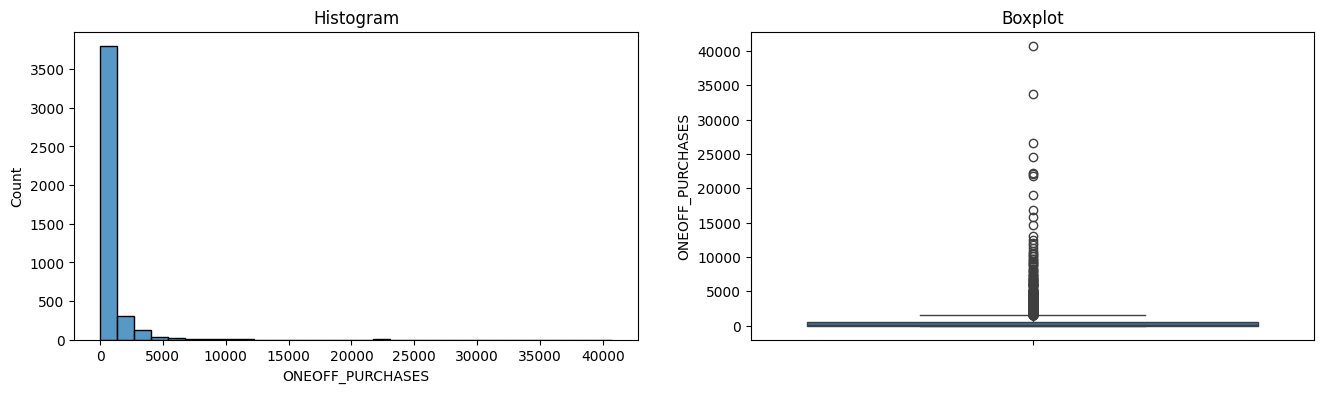


ONEOFF_PURCHASES - After Capping


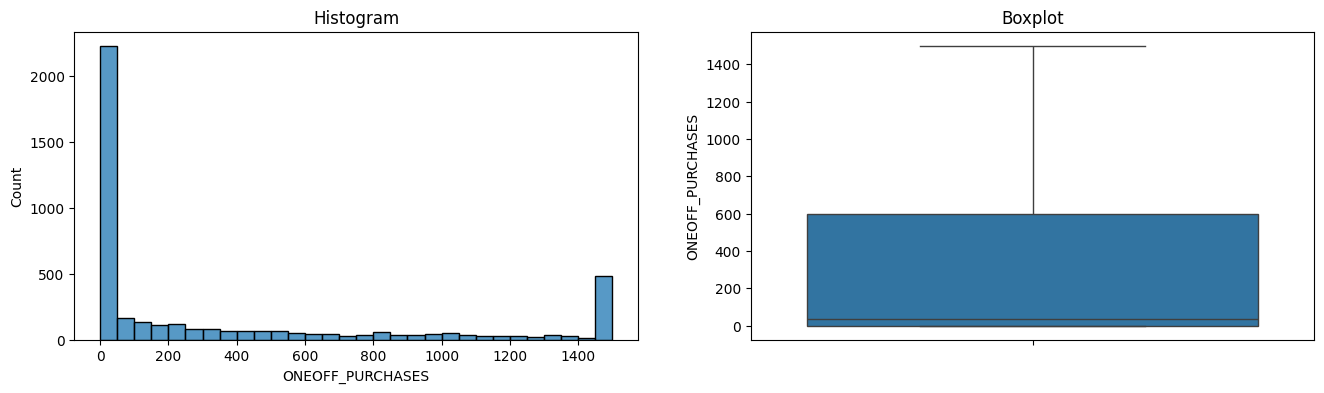

PAYMENTS - Before Capping


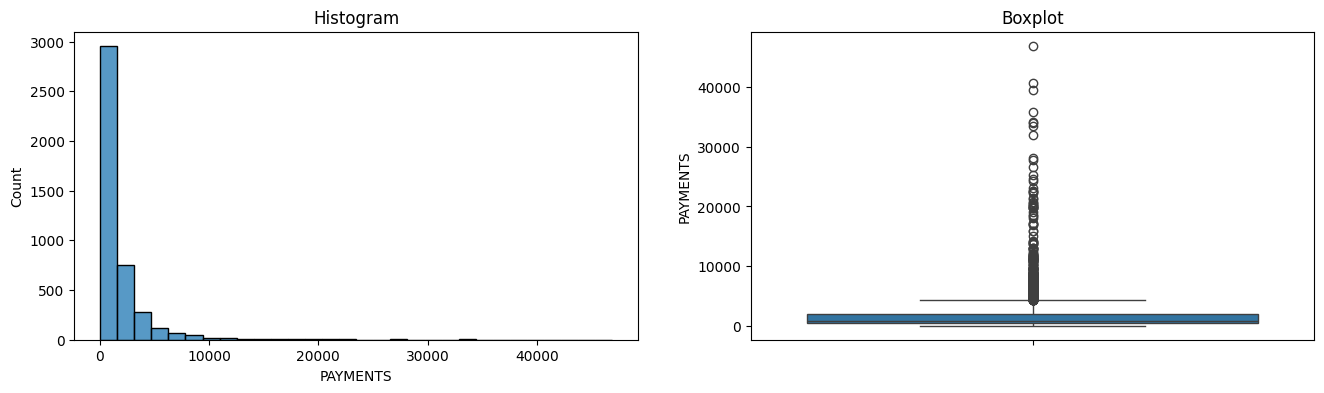


PAYMENTS - After Capping


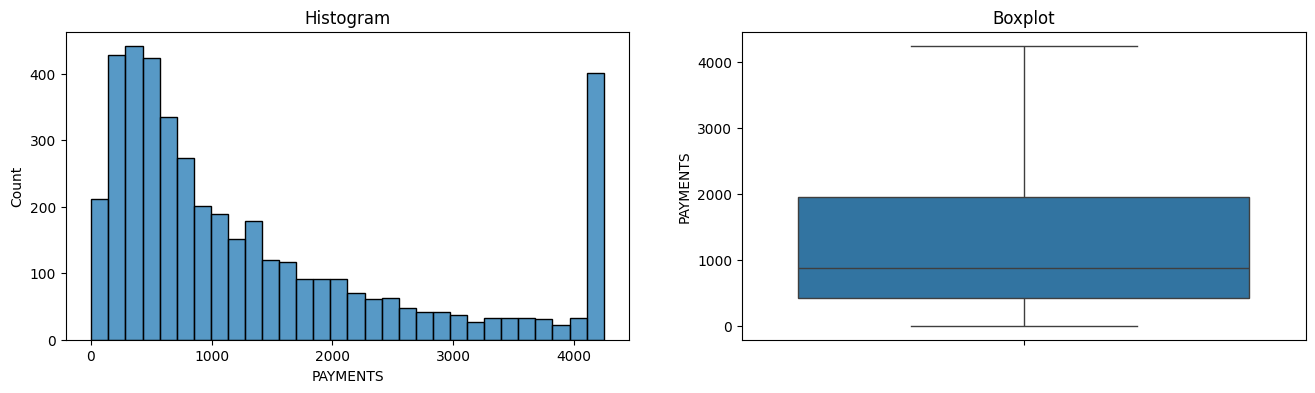

PRC_FULL_PAYMENT - Before Capping


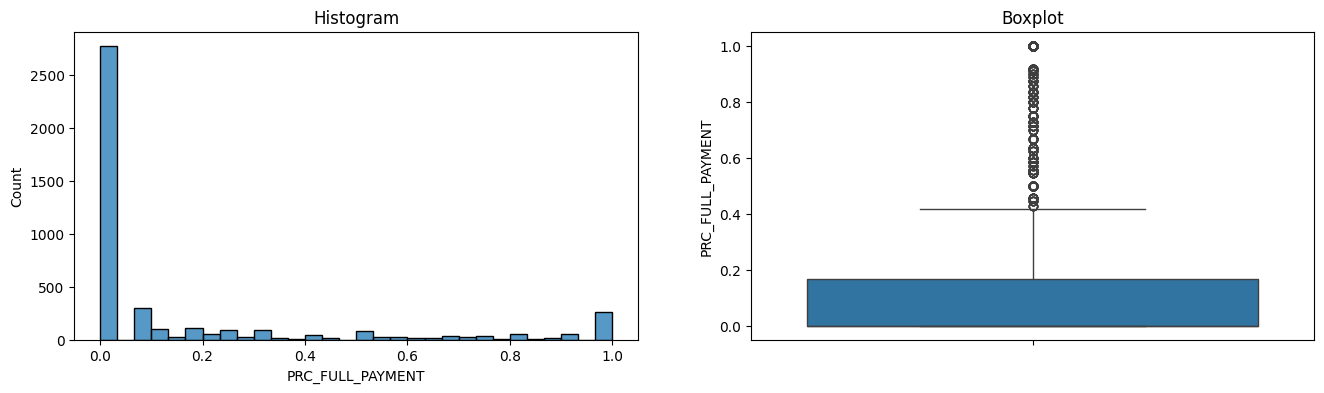


PRC_FULL_PAYMENT - After Capping


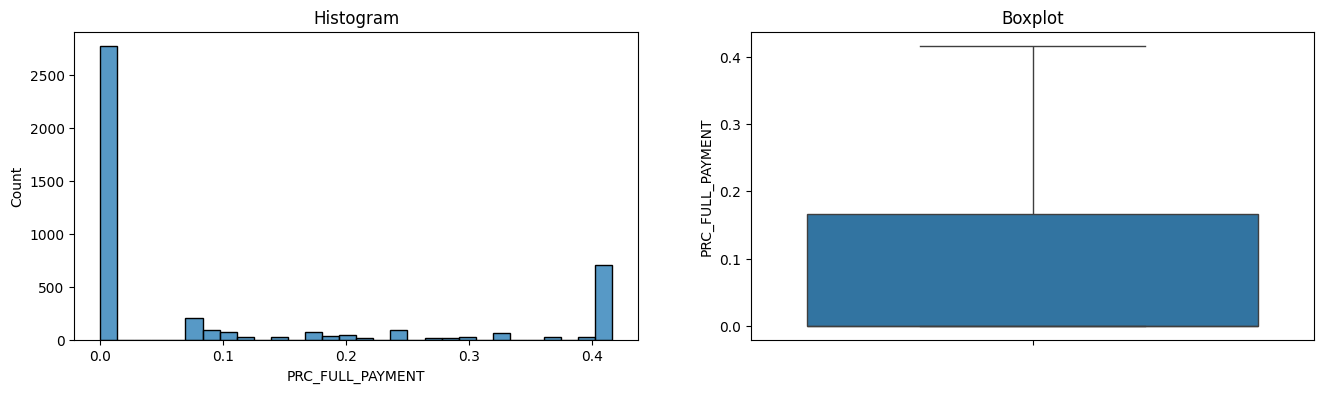

PURCHASES - Before Capping


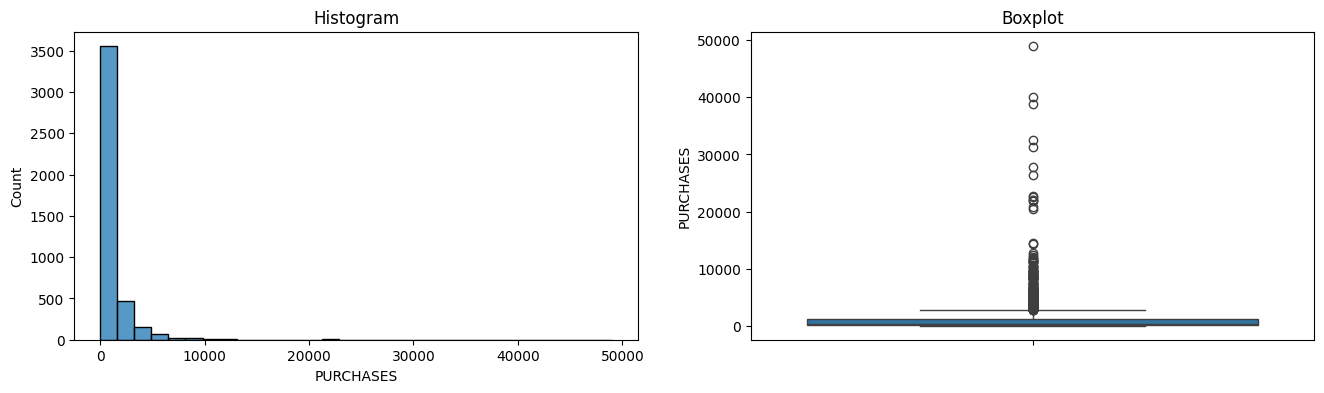


PURCHASES - After Capping


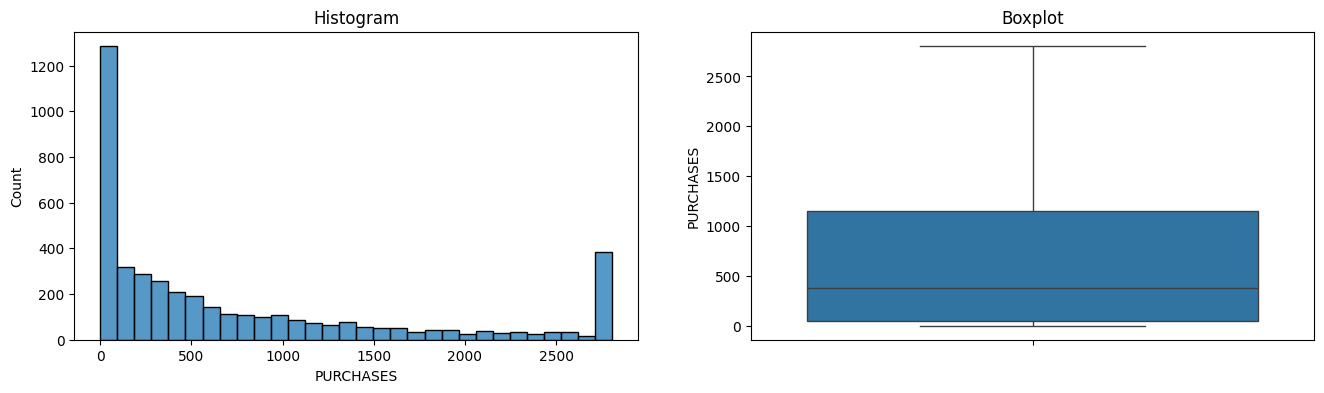

PURCHASES_TRX - Before Capping


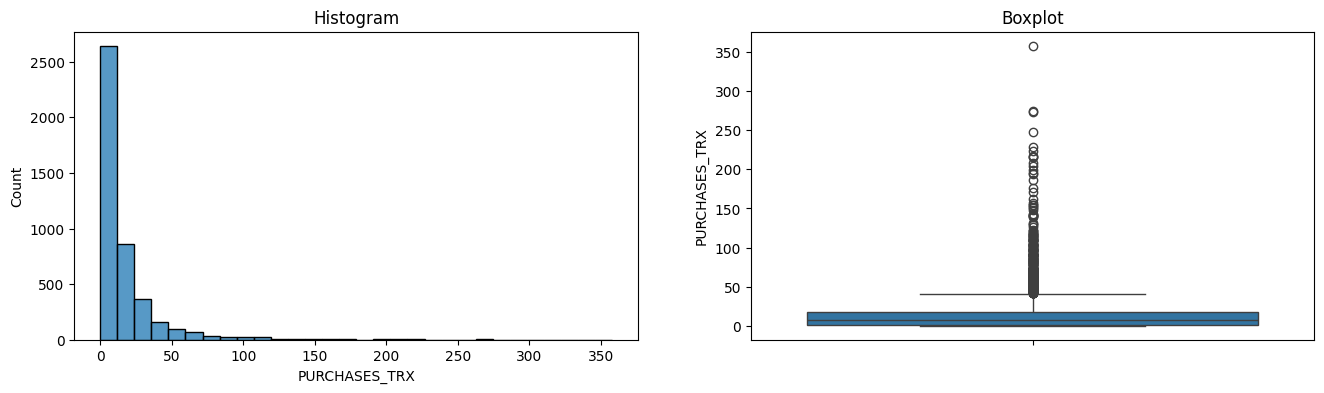


PURCHASES_TRX - After Capping


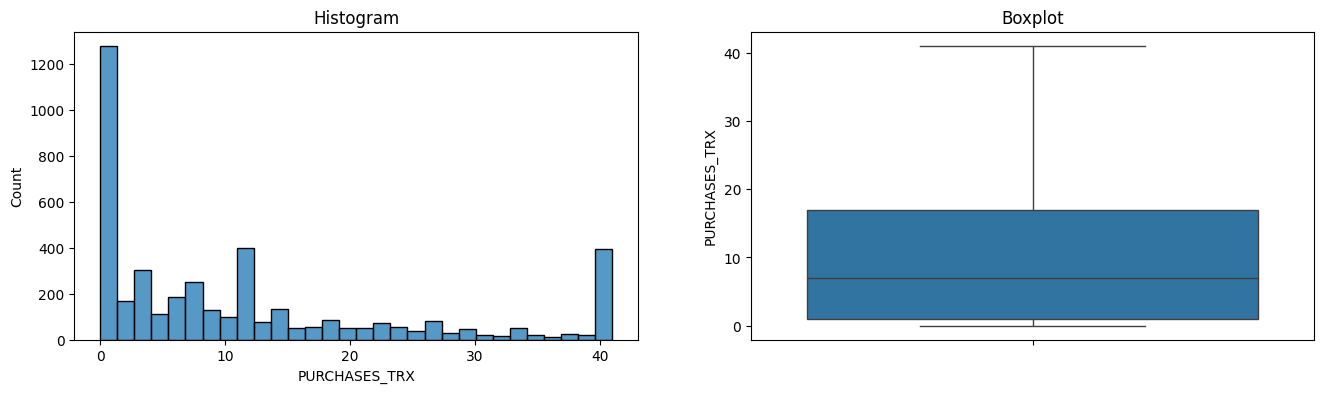

In [18]:
# loop
for col in restskew:
    print(f'{col} - Before Capping')
    diagnostic_plots(df2, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(datacapped, col)

## Scalling and PCA

### Dimensional Reduction

Dimensional Reduction adalah sebuah technique untuk mengurangi jumlah fitur dalam sebuah dataset sambil mempertahankan sebanyak mungkin informasi yang relevan. Tujuan utamanya adalah untuk menyederhanakan dataset yang kompleks, membuatnya lebih mudah diatur, diinterpretasikan, dan lebih efisien secara komputasional.

Scaller yang digunakan adalah MinMaxScaler dikarenakan scaller yang cocok untuk distribusi data yang skew.

In [19]:
# Feature scaling
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(datacapped)

pca = PCA()
pca.fit(data_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

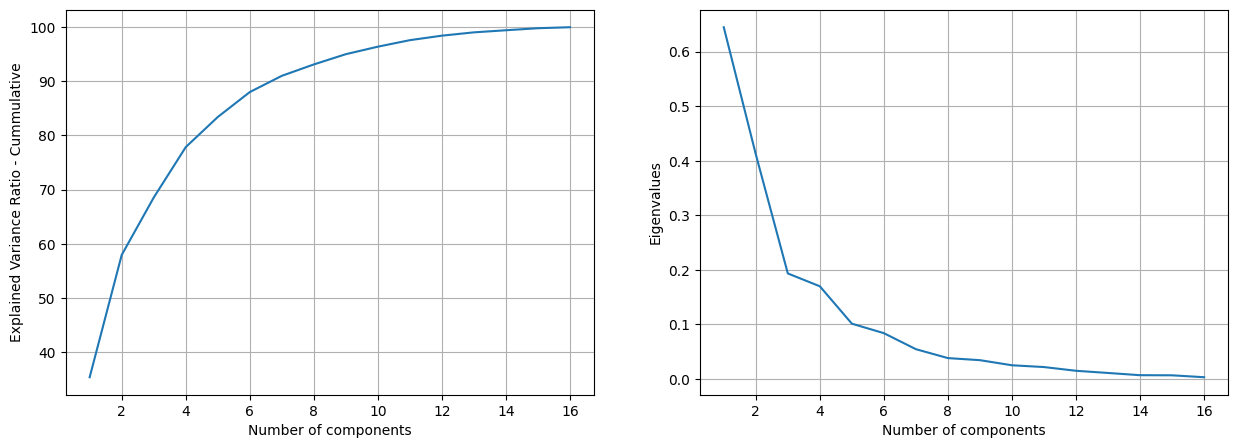

In [20]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Berdasarkan visualisasi diatas dapat disimpulkan:
dengan retain 95% data, maka jumlah fitur yang optimal adalah 9 - 11

In [21]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(9)

Dengan mempertahankan 95% data, maka jumlah fitur yang akan digunakan adalah sebanyak 9

In [22]:
# train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(data_scaled)

data_scaled_pca = pca.transform(data_scaled)

# Model Definition

## Elbow Method

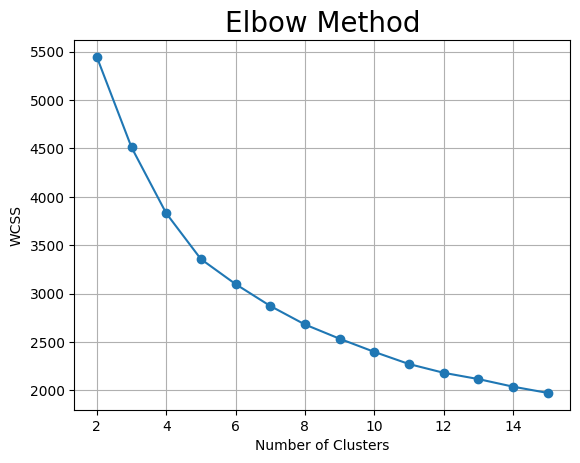

In [23]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 46
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa:
- Elbow point tidak dapat terlihat jelas, maka dari itu untuk memastikan nilai jumlah cluster akan menggunakan Silhoutte plot dan silhoutte score

## Silhoutte Plot & Silhoutte Score

For n_clusters = 2 The average silhouette_score is : 0.2600565231456056
For n_clusters = 3 The average silhouette_score is : 0.22380522418519605
For n_clusters = 4 The average silhouette_score is : 0.23167251650858972
For n_clusters = 5 The average silhouette_score is : 0.2430891303944315
For n_clusters = 6 The average silhouette_score is : 0.2480918094555593
For n_clusters = 7 The average silhouette_score is : 0.2487825748718157
For n_clusters = 8 The average silhouette_score is : 0.24550142541150624
For n_clusters = 9 The average silhouette_score is : 0.23700733641614152
For n_clusters = 10 The average silhouette_score is : 0.24214416737408623
For n_clusters = 11 The average silhouette_score is : 0.2440598906970541
For n_clusters = 12 The average silhouette_score is : 0.24300332214933473
For n_clusters = 13 The average silhouette_score is : 0.23749173731874787
For n_clusters = 14 The average silhouette_score is : 0.24356368547157417


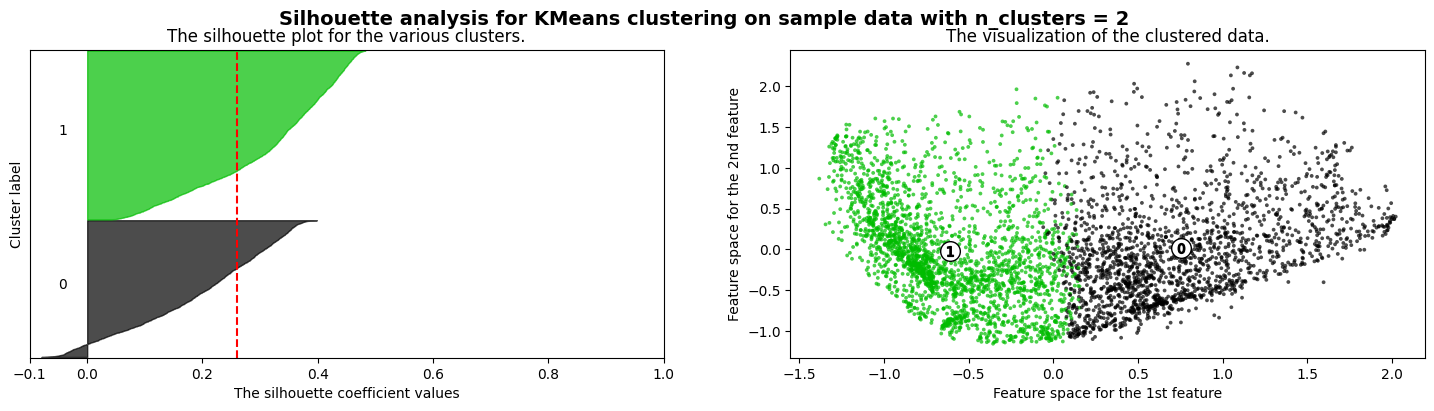

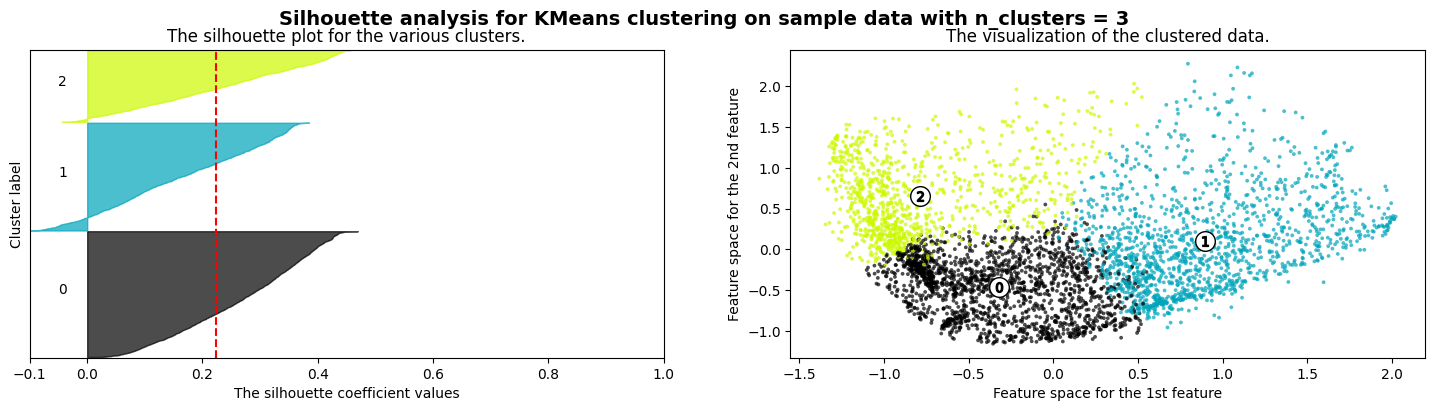

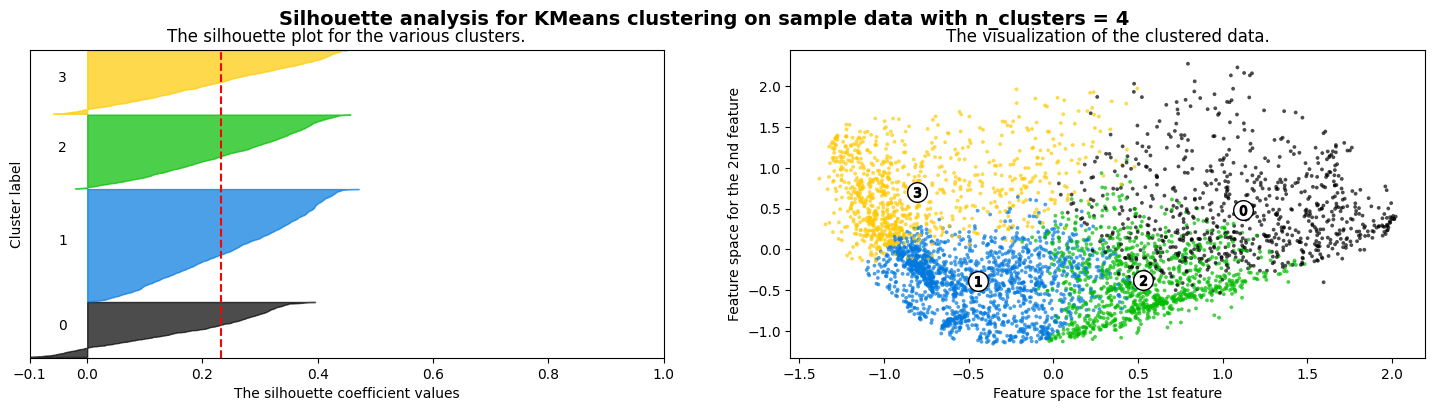

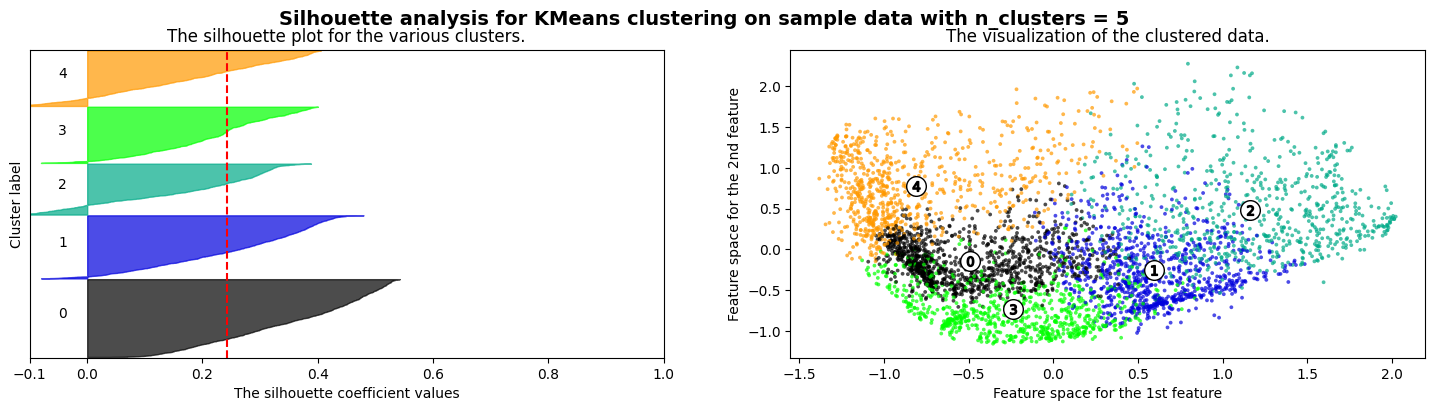

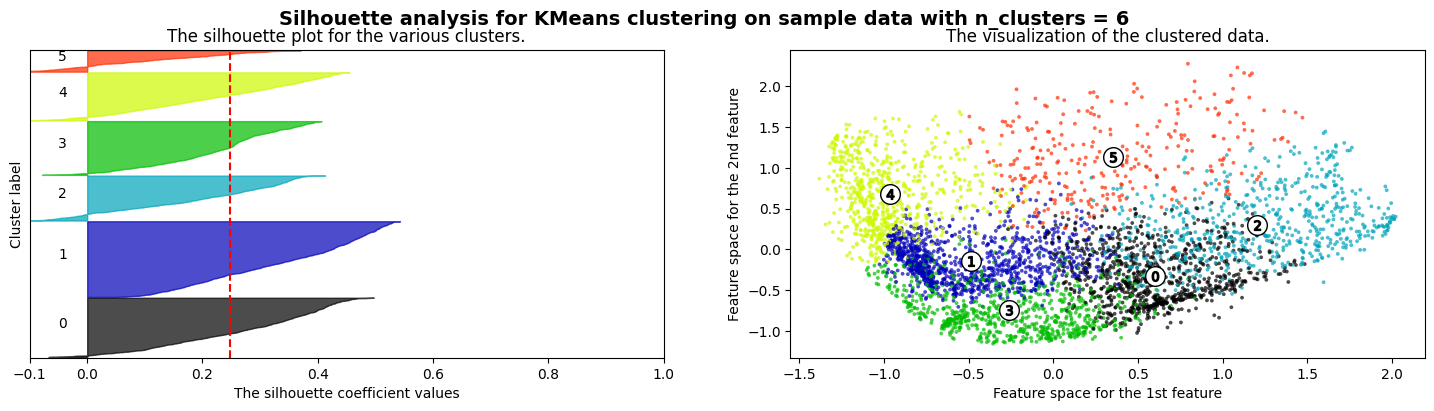

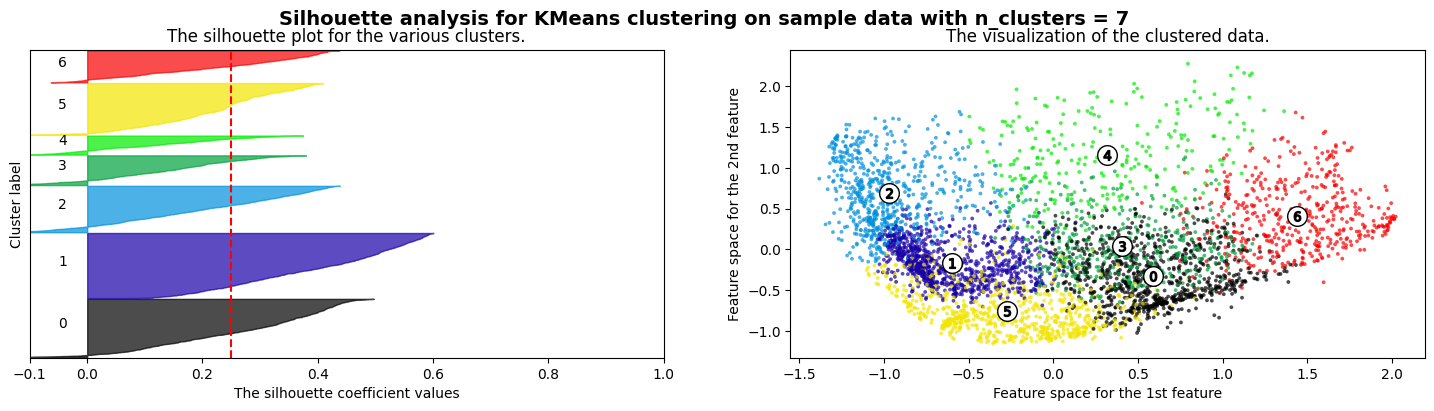

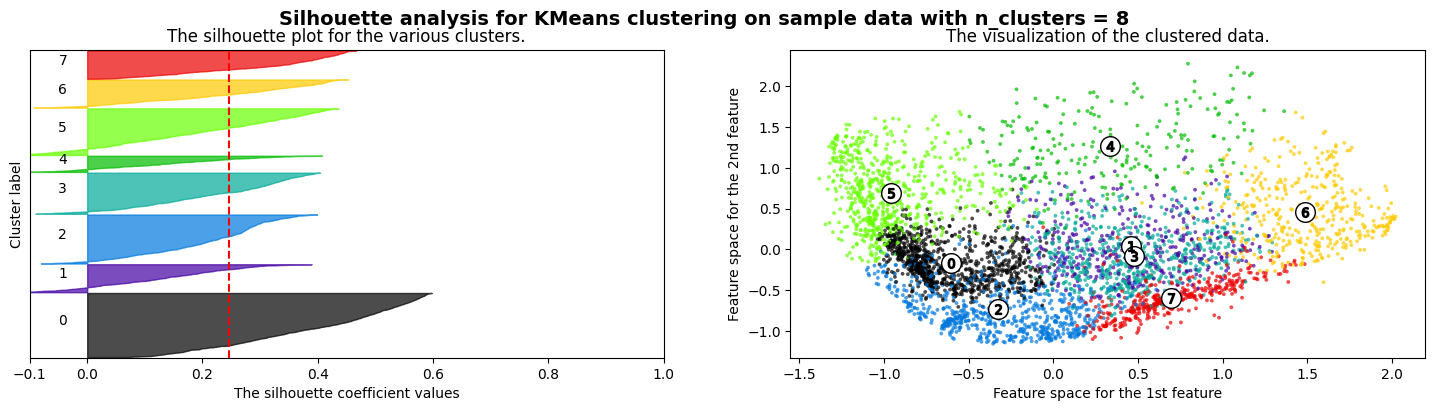

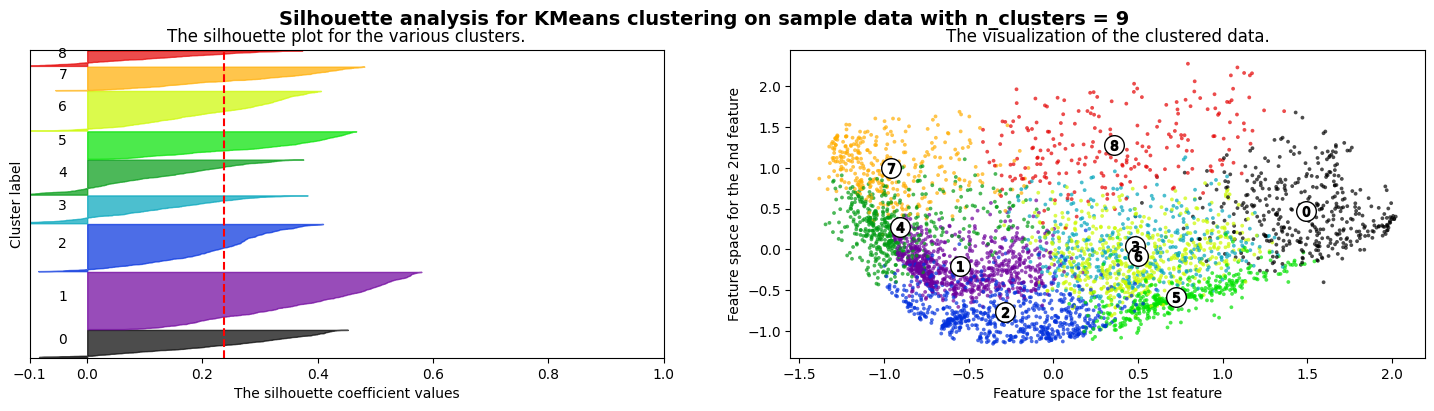

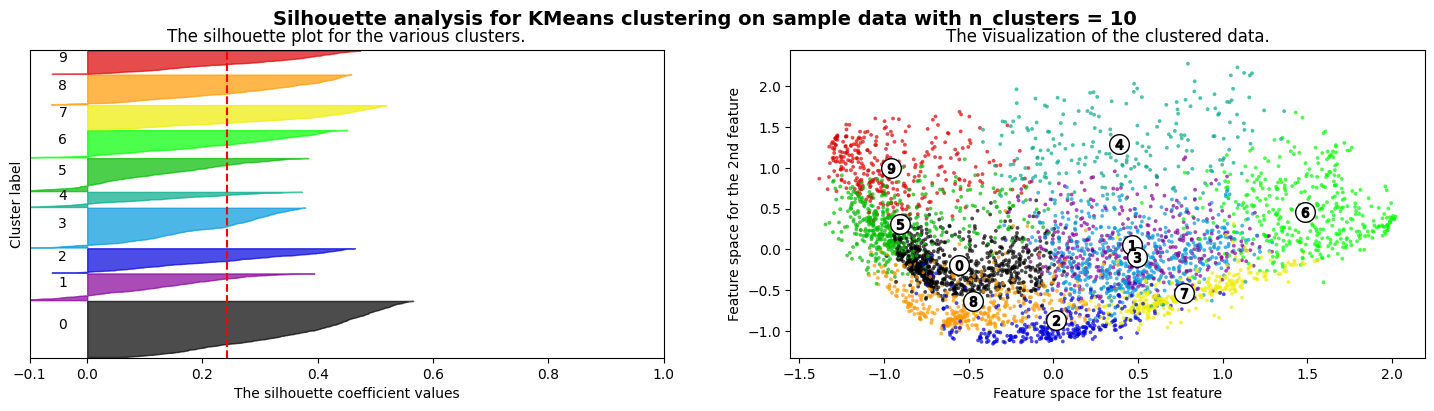

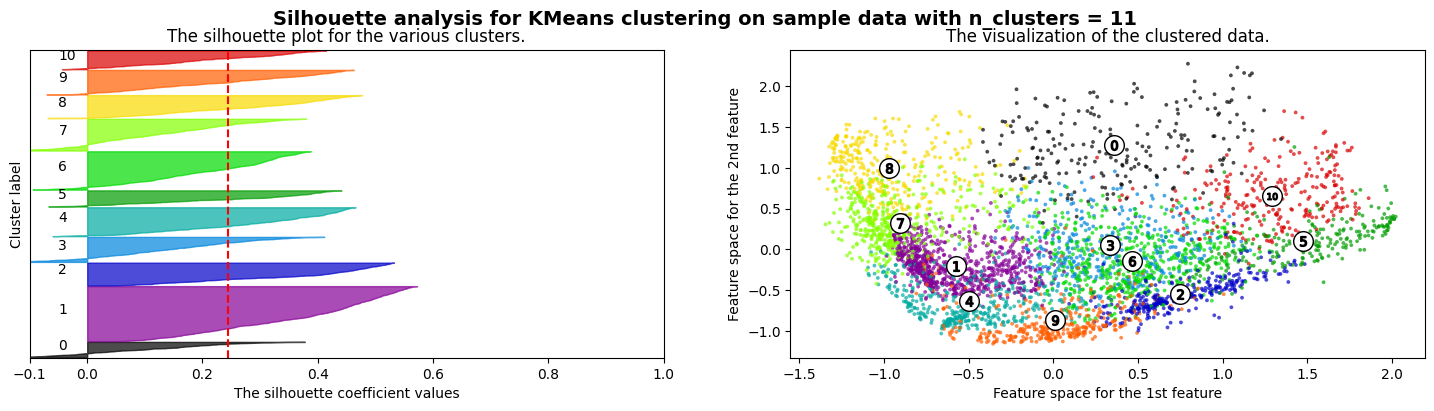

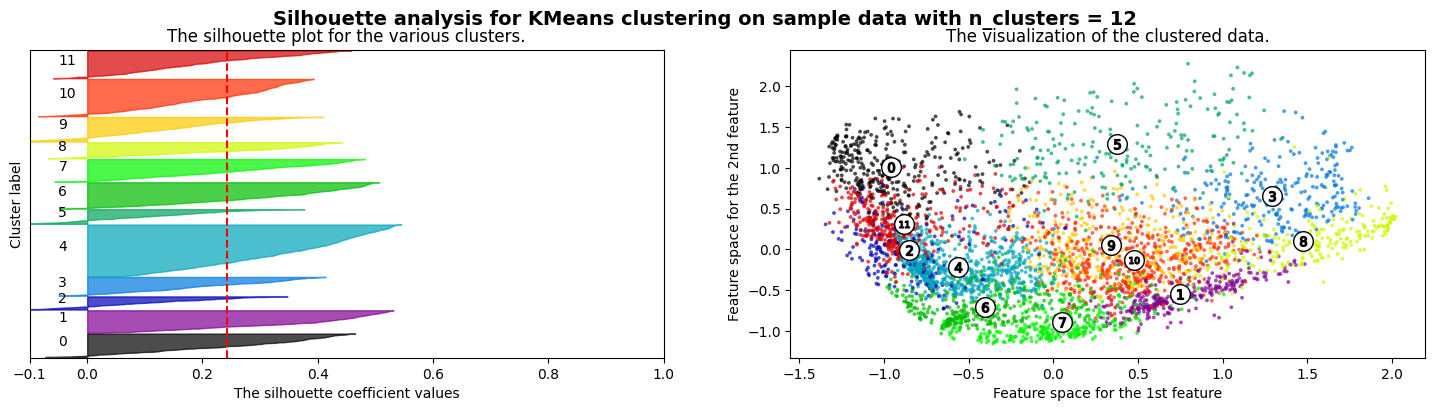

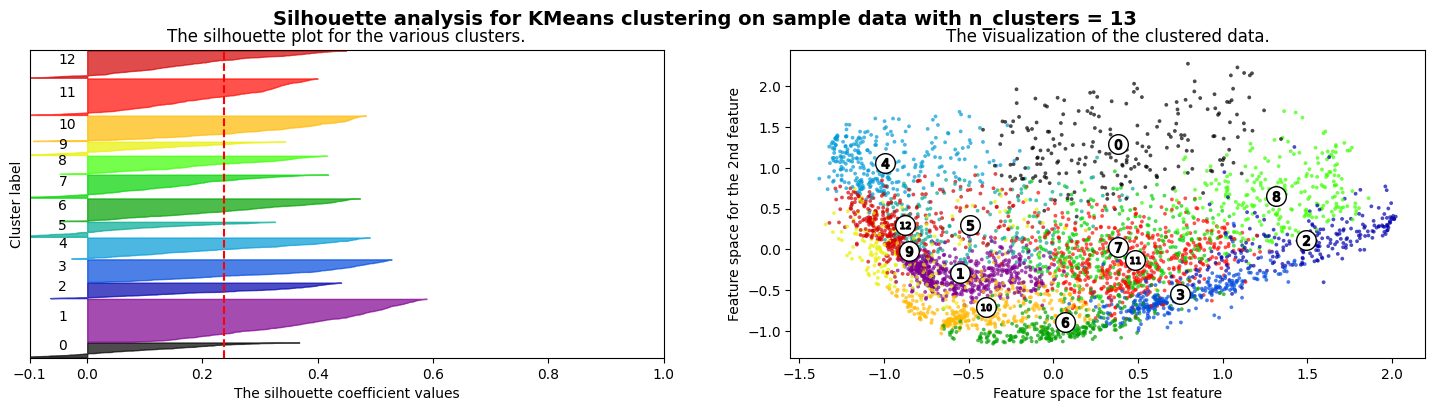

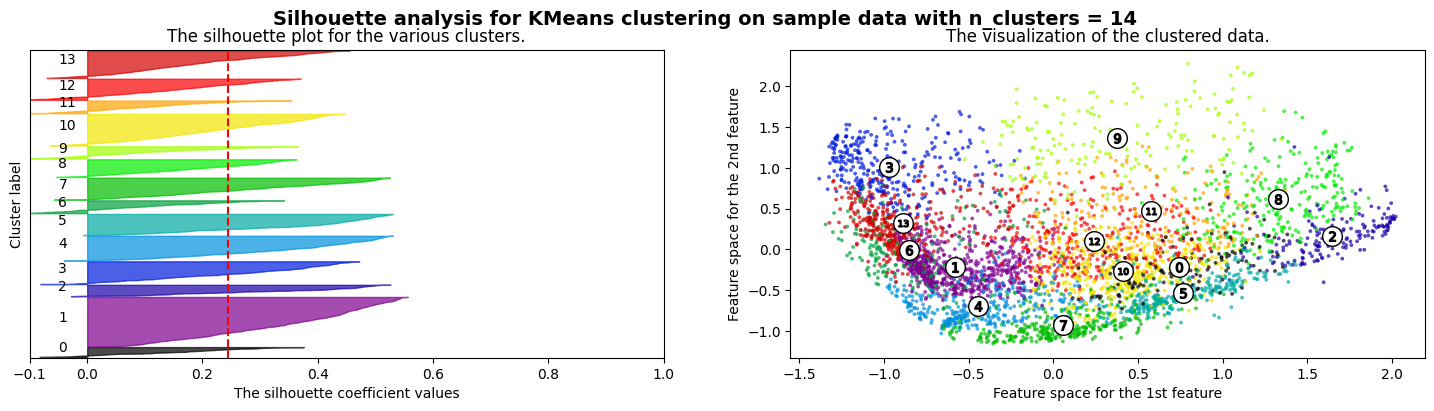

In [24]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)


**Berdasarkan hasil Silhouette analyss diatas dapat disimpulkan bahwa:**
- n cluster 4 dan n cluster 5 memiliki visualisasi clustered data yang lebih baik dibandingkan dengan n cluster yang lain
- n cluster 5 memiliki score yang lebih baik dari n cluster 4
- n cluster 4 memiliki keunggulan yang dapat dilihat pada silhouette plot yang mengindikasikan memiliki data potensi misklasifikasi yang lebih sedikit dibandingkan dengan n cluster 5

Dengan mempertimbangkan score, persebaran data dan potensi misklasifikasi data, maka jumlah cluster yang akan digunakan adalah 4. dengan selisih score yang relatif kecil dan memiliki potensi misklasifikasi yang jauh berbeda, n cluster 4 menjadi pilihan yang lebih baik.

# Model Training

In [25]:
# Train with optimal number of clusters which is 4

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 46)
pred = km.fit_predict(data_scaled_pca)

Melakukan model training dengan parameter cluster yang sudah ditentukan dari hasil test menggunakan Elbow method, Silhouette plot dan silhouette score

In [26]:
# Menambahkan klasifikasi cluster pada table 
df2['cluster'] = pred
df2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
1      215.325023        410.484825          0.000000        1  
3      258.032630        151.696433          0.000000        1  
4      397.090516        227.143184          0.000000        1  
5      343.102984        712.986387          0.000000        1  
7       57.266292         56.720210          0.000000        1  
...           ...               ...               ...      ...  
4470  1379.635287        271.364415          0.090909        3  
4471  4372.148648        241.645387          0.090909        3  
4

<Axes: >

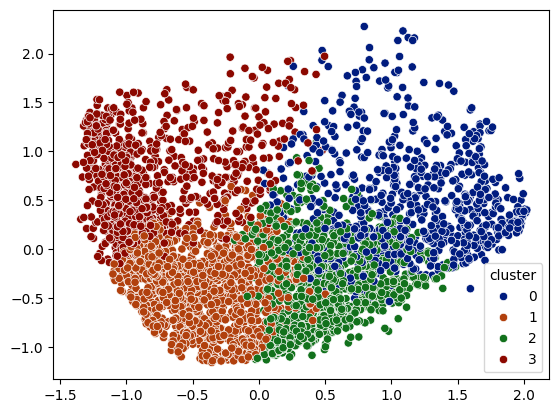

In [27]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

data_scaled_pca_pca_2d = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=data_scaled_pca_pca_2d[:,0], y=data_scaled_pca_pca_2d[:,1], hue=df2['cluster'], palette='dark')

**Karakteristik klaster berdasarkan visualisasi diatas:**

Klastering cukup jelas, dengan setiap klaster membentuk wilayah yang relatif terpisah. Ini menunjukkan bahwa algoritma klastering secara efektif mengelompokkan titik data.

Dikarenakan data yang 2 dimensi, titik data cluster yang berhimpitan dengan cluster lain belum tentu misklasifikasi dikarenakan visualisasi data diatas hanya berbentuk 2 dimensi, ini memungkinkan posisi data yang sebenarnya berada di depan atau belakang cluster yang berhimpitan.

# Cluster Analysis

## Cluster Overall Characteristics

Berikut adalah nilai average atau mean setiap cluster terhadap fiturnya masing masing.

In [28]:
# Function cluster statistic based on mean
def clusterStats(clusterNumber):
    cluster = df2[df2['cluster'] == clusterNumber]
    numRows = cluster.shape[0]
    totalRows = df2.shape[0]
    percentage = (numRows / totalRows) * 100
    
    stats = {
        'Cluster': clusterNumber,
        'Jumlah Customer': numRows,
        'Percentage Customer': f'{percentage:.2f}%'
    }
    
    mean_values = cluster.mean().to_dict()
    stats.update(mean_values)
    
    return stats

# Collect statistics for each cluster
clusterStatistic = []
for i in range(4):  # Adjust the range based on the number of clusters
    clusterStatistic.append(clusterStats(i))

# Convert to DataFrame
clusterStats = pd.DataFrame(clusterStatistic)

# Remove old cluster column
clusterStats = clusterStats.drop(columns=['cluster'])


# Display the DataFrame
clusterStats


Cluster  Jumlah Customer Percentage Customer      BALANCE  \
0        0              781              18.10%  2235.823891   
1        1             1591              36.86%   890.320940   
2        2             1045              24.21%   562.805951   
3        3              899              20.83%  3509.769673   

   BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.978252  3707.472202       2464.898195             1242.636748   
1           0.806704   291.591722        237.214199               54.645519   
2           0.915444   764.281234        105.738670              659.614890   
3           0.956304   296.941846        200.150189               96.866129   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    601.823959             0.903385                    0.658544   
1    324.985044             0.211497                    0.125114   
2    125.497181             0.873663                    0.087395   
3   3494.536426             0.205029                    0.091216   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.651226                0.078545          1.874520   
1                          0.084686                0.078059          1.233187   
2                          0.808700                0.028904          0.545455   
3                          0.119738                0.414074         11.170189   

   PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  \
0      46.696543   7312.230241  3676.788490       1011.195775   
1       3.700817   3236.915986   912.712892        571.973323   
2      16.989474   3255.273791   914.073419        645.501170   
3       4.196885   5856.395996  2701.462750       1461.908473   

   PRC_FULL_PAYMENT  
0          0.237573  
1          0.100482  
2          0.308395  
3          0.039834

##  Data Visualization

### Cluster Percentage

In [29]:
# cluster value counts
cluspercentage = df2['cluster'].value_counts().reset_index()
display(cluspercentage)

# visualization
fig = px.pie(cluspercentage, names="cluster", 
              values="count", 
              title="Cluster Percentage",
              hover_data=["count"], 
              )
fig.show()

cluster  count
0        1   1591
1        2   1045
2        3    899
3        0    781

**Insight:**
- Cluster 1 dengan total customer terbanyak dengan nilai 1591 atau sekitar 36% dari jumlah total customer
- Cluster 0 dengan total customer paling sedikit dengan nilai 781 atau sekitar 18.1% dari jumlah total customer

### Average Balance by Cluster

In [30]:
# Groupby average balance antar cluster
avgBalance = clusterStats.groupby('BALANCE')['Cluster'].mean().sort_values(ascending=False).reset_index()

# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
avgBalance['Cluster'] = avgBalance['Cluster'].map(urutanCluster)

display(avgBalance)

fig = px.bar(avgBalance, x='Cluster', y='BALANCE', orientation='v',text_auto='.2f')
fig.show()

BALANCE    Cluster
0  3509.769673  Cluster 3
1   562.805951  Cluster 2
2   890.320940  Cluster 1
3  2235.823891  Cluster 0

**Insight:**
- Cluster 3 memiliki rata rata balance atau saldo yang sangat tinggi 
- Cluster 2 memiliki rata rata balance atau saldo yang rendah

### Average Purchases Amount by Cluster

In [31]:
# Groupby average purchases antar cluster
purchasesTotal = clusterStats.groupby('PURCHASES')['Cluster'].mean().sort_values(ascending=False).reset_index()
# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
purchasesTotal['Cluster'] = purchasesTotal['Cluster'].map(urutanCluster)

# display dataframe
display(purchasesTotal)

# visualization
fig = px.bar(purchasesTotal, x='PURCHASES', y='Cluster', orientation='h',text_auto='.2f')
fig.show()

PURCHASES    Cluster
0   296.941846  Cluster 3
1   764.281234  Cluster 2
2   291.591722  Cluster 1
3  3707.472202  Cluster 0

**Insight:**
- Cluster 0 memiliki rata rata jumlah pembelian yang sangat tinggi dibandingkan dengan cluste ryang lain
- Cluster 3 walaupun memiliki balance yang tinggi, nilai purchase yang dimiliki cluster 3 sangat rendah

### Average Purchases Frequency by Cluster

In [32]:
# Groupby average purchases frequency 
purchaseFreq = clusterStats.groupby('PURCHASES_FREQUENCY')['Cluster'].mean().reset_index()

# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
purchaseFreq['Cluster'] = purchaseFreq['Cluster'].map(urutanCluster)

# display dataframe
display(purchaseFreq)

# visualization
fig = px.bar(purchaseFreq, x='PURCHASES_FREQUENCY', y='Cluster', orientation='h',text_auto='.2f')
fig.show()


PURCHASES_FREQUENCY    Cluster
0             0.205029  Cluster 3
1             0.211497  Cluster 1
2             0.873663  Cluster 2
3             0.903385  Cluster 0

**Insight:**
- Cluster 0 dan 2 termasuk cluster yang sangat sering melakukan pembelian
- Butuh strategi khusus untuk meningkatkan frekuensi pembelian cluster 1 dan 3

### Average Credit Limit by Cluster

In [33]:
# Groupby average credit limit
credLimit = clusterStats.groupby('CREDIT_LIMIT')['Cluster'].mean().reset_index()

# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
credLimit['Cluster'] = credLimit['Cluster'].map(urutanCluster)

# display dataframe
display(credLimit)

# visualization
fig = px.bar(credLimit, x='CREDIT_LIMIT', y='Cluster', orientation='h',text_auto='.2f')
fig.show()

CREDIT_LIMIT    Cluster
0   3236.915986  Cluster 1
1   3255.273791  Cluster 2
2   5856.395996  Cluster 3
3   7312.230241  Cluster 0

**Insight:**
- Cluster 0 dan 3 memiliki credit limit yang besar
- Cluster 3 memiliki credit limit yang besar tetapi memiliki purchase amount dan frequency yang rendah

### Average One Off purchases by Cluster

In [34]:
# Groupby average one off purchases
oneOff = clusterStats.groupby('ONEOFF_PURCHASES')['Cluster'].mean().reset_index()

# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
oneOff['Cluster'] = oneOff['Cluster'].map(urutanCluster)

# display dataframe
display(oneOff)

# visualization
fig = px.bar(oneOff, x='ONEOFF_PURCHASES', y='Cluster', orientation='h',text_auto='.2f')
fig.show()


ONEOFF_PURCHASES    Cluster
0        105.738670  Cluster 2
1        200.150189  Cluster 3
2        237.214199  Cluster 1
3       2464.898195  Cluster 0

**Insight:**
- Cluster 0 terhitung sangat sering melakukan one off purchases
- Cluster 2 termasuk cluster yang sangat rendah dalam melakukan one off purchases

### Average Purchases installments by Cluster

In [35]:
# Groupby installments purchases
installment = clusterStats.groupby('INSTALLMENTS_PURCHASES')['Cluster'].mean().reset_index()

# Mapping cluster
urutanCluster = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}

# apply urutan
installment['Cluster'] = installment['Cluster'].map(urutanCluster)

# display dataframe
display(installment)

# visualization
fig = px.bar(installment, x='INSTALLMENTS_PURCHASES', y='Cluster', orientation='h',text_auto='.2f')
fig.show()

INSTALLMENTS_PURCHASES    Cluster
0               54.645519  Cluster 1
1               96.866129  Cluster 3
2              659.614890  Cluster 2
3             1242.636748  Cluster 0

**Insight:**
- Selain sering melakukan one off purchases, cluster 0 sering melakukan installments purchases
- Cluster 2 lebih sering melakukan installment purchases dibandingkan one off purchases.

## Cluster Analysis Summary

#### Cluster 0

In [36]:
# print cluster name
print('Cluster 0    :')

# print data only in cluster 0
display(clusterStats[clusterStats['Cluster']==0])

Cluster 0    :


Cluster  Jumlah Customer Percentage Customer      BALANCE  \
0        0              781              18.10%  2235.823891   

   BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.978252  3707.472202       2464.898195             1242.636748   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0    601.823959             0.903385                    0.658544   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.651226                0.078545           1.87452   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      46.696543   7312.230241  3676.78849       1011.195775          0.237573

**Cluster 0 :**
- **Jumlah Customers**: 781
- **Percentase Customers**: 18.10%
    - Memiliki Balance yang tinggi
    - Memiliki Jumlah pembelian yang tinggi
    - Memiliki Frekuensi pembelian yang tinggi
    - Memiliki Credit limit yang tinggi
    - Memiliki Rata rata one-off purchase yang tinggi
    - Memiliki rata rata installment purchase yang tinggi

#### Cluster 1

In [37]:
# print cluster name
print('Cluster 1    :')

# print data only in cluster 1
display(clusterStats[clusterStats['Cluster']==1])

Cluster 1    :


Cluster  Jumlah Customer Percentage Customer    BALANCE  BALANCE_FREQUENCY  \
1        1             1591              36.86%  890.32094           0.806704   

    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
1  291.591722        237.214199               54.645519    324.985044   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
1             0.211497                    0.125114   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
1                          0.084686                0.078059          1.233187   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
1       3.700817   3236.915986  912.712892        571.973323          0.100482

**Cluster 1 :** 
- **Jumlah Customers**: 1591
- **Percentase Customers**: 36.86%
  - Memiliki Balance yang rendah
  - Memiliki Jumlah pembelian yang rendah
  - Memiliki Frekuensi pembelian yang rendah
  - Memiliki Credit limit menengah
  - Memiliki Rata rata one-off purchase yang relatif rendah dibandingkan dengan cluster 0 tetapi masih dirange menengah
  - Memiliki rata rata installment purchase yang rendah

#### Cluster 2

In [38]:
# print cluster name
print('Cluster 2    :')

# print data only in cluster 2
display(clusterStats[clusterStats['Cluster']==2])

Cluster 2    :


Cluster  Jumlah Customer Percentage Customer     BALANCE  \
2        2             1045              24.21%  562.805951   

   BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
2           0.915444  764.281234         105.73867               659.61489   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
2    125.497181             0.873663                    0.087395   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
2                            0.8087                0.028904          0.545455   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
2      16.989474   3255.273791  914.073419         645.50117          0.308395

**Cluster 2**
- **Jumlah Customers**: 1045
- **Percentase Customers**: 24.21%
  - Memiliki balance yang rendah
  - Memiliki jumlah pembelian menengah
  - Memliki frekuensi pembelian tinggi
  - Memiliki Credit limit menengah
  - Memiliki Rata rata one-off purchase yang sangat rendah
  - Memiliki rata rata installment purchase menengah

#### Cluster 3

In [39]:
# print cluster name
print('Cluster 3    :')

# print data only in cluster 3
display(clusterStats[clusterStats['Cluster']==3])

Cluster 3    :


Cluster  Jumlah Customer Percentage Customer      BALANCE  \
3        3              899              20.83%  3509.769673   

   BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
3           0.956304  296.941846        200.150189               96.866129   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
3   3494.536426             0.205029                    0.091216   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
3                          0.119738                0.414074         11.170189   

   PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
3       4.196885   5856.395996  2701.46275       1461.908473          0.039834

**Cluster 3 :**
- **Number of Customers**: 899
- **Percentage of Customers**: 20.83%
  - Memiliki balance tinggi
  - Memiliki jumlah pembelian yang rendah
  - Memiliki frekuensi pembelian yang rendah
  - Memiliki credit limit yang tinggi
  - Memiliki Rata rata one-off purchase yang rendah jika dibandingkan dengan cluster 0
  - Memiliki rata rata installment purchase yang rendah

# Model Saving

Melakukan model saving dengan pipeline agar model interference menjadi lebih mudah dan rapi

In [40]:
# pipeline with parameter
pipeKM = make_pipeline(MinMaxScaler(), PCA(n_components=0.95), KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state=46))
pipeKM1 = pipeKM.fit(datacapped)

In [41]:
# save model
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeKM1, file)

In [42]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Model Inference

*Model Inference dilakukan pada notebook yang berbeda.*

# Kesimpulan

### Kesimpulan Cluster:

**Cluster 0 : High Financial Activity /  High Value User**

Berdasarkan hasil cluster analisis diatas, dapat disimpulkan bahwa cluster 0 merupakan pengguna dengan aktivitas yang tinggi, sehingga cluster 0 dapat dikategoran sebagai high value atau high financial activity.


**Cluster 1 : Low Financial Activity /  Low Spender**

Berdasarkan hasil cluster analisis diatas, dapat disimpulkan bahwa cluster 1 merupakan pengguna dengan aktivitas yang rendah, dapat dilihat dari frekuensi pembelian yang ternilai rendah, sehingga cluster 1 dapat dikategorikan sebagai Low Financial Activity.


**Cluster 2 : Mid Financial Activity /  Frequent Mid Spender**

Berdasarkan hasil cluster analisis diatas, dapat disimpulkan bahwa cluster 2 merupakan pengguna dengan aktivitas menengah, rata rata cluster 2 sering melakukan pembelian dengan nilai rendah, hal ini ditandai dengan low balance namun memiliki aktivitas purchase yang tergolong tinggi. 


**Cluster 3 : High Balance /  Low Spender**

Berdasarkan hasil cluster analisis diatas, dapat disimpulkan bahwa cluster 3 merupakan pengguna yang memiliki high balance namun memiliki aktivitas pembelian yang rendah, hal ini dapat dilihat dari balance yang tinggi dan semua aktivitas tergolong rendah. yang dapat disimpulkan sebagai user yang memiliki banyak balance tapi tidak ada insentif atau tidak ada informasi untuk melakukan transaksi.

# Rekomendasi

Berdasarkan hasil cluster customer diatas, berikut strategi yang disarankan untuk menargetkan beberapa kluster secara efektif, berikut rekomendasi untuk setiap cluster:

**Cluster 0 :  High Financial Activity user**
1. Loyalty Programs dengan banyak penawaran atau bonus agar dapat mempertahankan customer cluster 0
2. Memberikan service yang lebih atau personal terhadap customer yang memiliki level loyalty yang tinggi

**Cluster 1 : Low Financial Activity user**
1. Membuat bunga 0% agar membangun habbit untuk menggunakan credit card
2. bunga akan ditambah secara perlahan sehingga user merasakan kenaikan 1% itu sedikit dikarenakan habbit yang sudah dibangun
3. Meningkatkan credit limit untuk meningkatkan daya beli customer

**Cluster 2 : Mid Financial Activity user**
1. Melakukan campuran strategi untuk High Value user dan Low Value user
2. Membuat rewards program untuk setiap pembelian, sehingga user merasakan benefit ketika sering melakukan purchase
3. Menambahkan payment plans untuk semakin memudahkan proses pembelian

**Cluster 3 : High Balance Low Spender**
1. Menawarkan atau memberikan produksi barang secara bundle
2. Membuat objective spending, seperti mid user dengan membuat rewards program dimana ada bonus tertentu jika melakukan spending tertentu


# Conceptual Problem




Untuk menjelaskan apa itu inertia dan elbow method, mari kita lihat visualisasi berikut yang diambil dari model ini

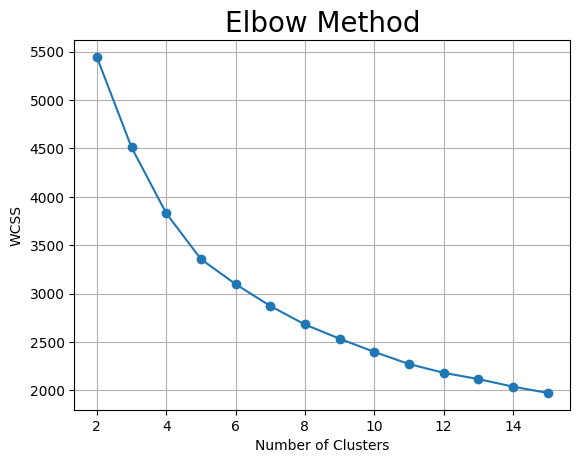



**Apa itu Inertia?**

Inertia adalah garis titik atau nilai wcss, dapat dilihat nilai inertia semakin kecil dengan semakin banyaknya cluster. nilai inertia akan semakin melambat atau stagnan ketika sudah menumukan cluster yang optimal. 

**Lalu apa itu Elbow?** 

Elbow adalah titik siku dimana terjadinya perubahan inertia melambat secara signifikan. pada data ini elbow kemungkinan berada pada cluster 4 - 6. untuk mencari tahu lebih pasti akan jumlah cluster yang ingin digunakan maka dapat digunakan silhouette plot dan score untuk mencari secara detail.

**Kenapa Menggunakan Elbow method?**
- Penyederhanaan analysis dengan visualisasi yang cukup mudah dimengerti

**Cara Penggunaan Elbow method**

Berdasarkan [Sub bab elbow method](#elbow-method) yang sudah dilakukan, cara penggunaannya adalah dengan membuat loop yang berisi melatih model K means dengan setiap cluster, dinotebook ini menggunakan maximal 15 cluster. Lalu membuat plot wcss/inertia dengan jumlah kluster. Lalu mengidentifikasi titik elbow atau titik dimana nilai inertia melambat secara signifikan.

**Kelebihan Elbow Method:**
- Simpel, dapat dilihat visualisasi diatas sangat mudah dan sederhana untuk dimengerti
- Visualisasi yang jelas

**Kekurangan Elbow Method:**
- Identifikasi siku bisa terlihat tidak jelas, seperti halnya dengan data diatas, titik siku tidak terlalu terlihat sehingga membutuhkan silhouette plot dan score untuk pengecekan lebih dalam
- Komputasi yang berat dikarenakan harus melatih model k-means dengan jumlah cluster yang banyak 